# Yash Singh Bedi
 14th november 2025
 YXB337
 

# Angular Distribution Analysis Using Monte Carlo Sampling and Bayesian Fitting

---

## Abstract

This project studies how well the parameters a1 and a2 can be measured in the angular model  
f(cos(theta)) = 1 + a1*cos(theta) + a2*cos(theta)^2.  
I built a full setup that generates events, applies detector effects, and fits the results using several methods.
The three main approaches were the forward-backward asymmetry, a binned chi-square fit, and an unbinned likelihood fit.
Their behaviour was examined for event counts between 1k and 100k.
The study also included acceptance cuts, angular smearing, Fisher information, the Cramer-Rao bound, and a simple Bayesian MCMC check.
A likelihood ratio test for a1 was added to see whether the fitted asymmetry can be separated from zero in a clear way.

The estimators all returned values close to the truth, and the errors followed the expected 1/sqrt(N) trend.
The unbinned likelihood fit was the most precise, while the forward-backward method had the widest spread as it uses only the sign of cos(theta).  
When the usable range was reduced to |cos(theta)| < 0.9, the information in a1 dropped by about 9 percent,  
and the best possible sigma(a1) rose by roughly 5 percent.  
The Bayesian posteriors matched the frequentist fits and showed the link between a1 and a2.
A likelihood ratio test was included to test a1 against the a1 = 0 case, and the simulated sample showed strong evidence for a non-zero asymmetry.

---

## Introduction

Angular distributions are widely used in particle physics to measure asymmetries and learn about  
the underlying interactions.  
This project examines the simple quadratic model

f(cos(theta)) = 1 + a1*cos(theta) + a2*cos(theta)^2,

where a1 controls the forward-backward balance and a2 sets the shape of the distribution.

The aim was to generate synthetic data, extract the parameters with several methods,  
and study how the accuracy changes with sample size and detector effects.  
Two reference setups were used:

- LEP: |cos(theta)| < 0.9, angular resolution around 3 mrad  
- PETRA: |cos(theta)| < 0.95, angular resolution around 7 mrad

These served as realistic examples of how acceptance and resolution can limit precision.

---

## Method

### 1. Monte Carlo Sampling

A class named sampleGen was written to draw random cos(theta) values from the model  
using acceptance-rejection sampling.

Steps:
1. Set the range, usually [-1, 1].  
2. Evaluate the model on a grid to find a safe upper bound.  
3. Propose random x values in the range.  
4. Keep each value with probability proportional to the model.  
5. Continue until the target number of samples is reached.

This gave realistic event sets that followed the expected shape.

---

### 2. Parameter Estimation

Three approaches were used.

#### (a) Forward-Backward Asymmetry

A simple count-based observable:

A_FB = (N_fwd - N_bwd) / N_tot.

This uses only the sign of cos(theta), so it is quick to compute  
but less precise than the shape-based fits.

#### (b) Binned Chi-Square Fit

Data were sorted into bins of cos(theta).  
The expected counts were computed from exact bin integrals of the model.  
The fit searched for the a1 and a2 values that gave the smallest chi-square.

#### (c) Unbinned Maximum Likelihood Fit

The unbinned fit used each event directly.  
For fixed a2, the normalisation over [-c, c] depended only on a2,  
so the likelihood for a1 was well behaved.

The log-likelihood was:

log L = sum log(1 + a1*x + a2*x^2) - N*log(Z),

and the best a1 was found by numerical minimisation.  
The uncertainty came from the curvature around the minimum.

---

### 3. Detector Effects

Two effects were applied:

- a Gaussian smear on theta to mimic resolution  
- a cut on |cos(theta)| to mimic limited coverage

These were applied to the true angles to produce measured angles.  
The settings matched those from LEP and PETRA.

---

### 4. Statistical Comparison

Fisher information was calculated for the quadratic model,  
and the Cramer-Rao lower bound was used to set the smallest possible sigma(a1) and sigma(a2).  
These limits were compared with the spread seen in repeated simulations.

---

### 5. Bayesian MCMC

A Metropolis-Hastings sampler was used to explore the posterior.  
Two versions were run:

- a1 only (a2 fixed)  
- (a1, a2) jointly

Chains were run for roughly 20k to 30k steps,  
with burn-in and thinning.  
Posterior medians and 68 percent intervals were compared with the likelihood results.

---

## Results

### 1. Monte Carlo Generation and Event Asymmetry

The generator produces samples that follow the expected angular shape.This was checked by plotting the sample against the model curve. When the event count increases, the spread in A_FB falls as 1/sqrt(N),(shown in figure 1 &2)
matching the usual behaviour of counting statistics. This shows that the generator, the asymmetry calculation, and the mapping from A_FB to a1 work as intended.

---

### 2. Comparison of Fitting Methods

The three estimators behave differently once statistics grow:

- A_FB gives the widest spread because it only uses the sign of cos(theta).
- The binned fit improves as the number of bins rises, provided the bins are not too coarse.
- The unbinned likelihood fit gives the sharpest spread and stays consistent across all N which is clear in figures 15 &16

The predicted errors from each method match the observed spread from repeated samples, which confirms that the uncertainty estimates are reliable. 

---

### 3. Detector Acceptance and Angular Smearing

Removing the forward and backward edges by restricting |cos(theta)| to 0.9 cuts away the region most sensitive to a1. This reduces the available information by about 9 percent and raises the smallest possible sigma(a1) by roughly 5 percent ( shown in figures 24&25 ). The fits follow this shift closely.
Smearing the angle by a few mrad applies a similar softening of the spectrum, which increases sigma(a1) by a further 5 to 10 percent.


---

### 4. Sensitivity Studies

**Bin count**

When fewer than about 20 bins are used, the shape of the spectrum is not captured well. With 40 to 80 bins, the fit stabilises and the error on a1 approaches the unbinned result. The chi2 per degree of freedom stays close to one, showing that the model describes the data. (Shown in figures 3 and 4)

**Starting values**

The fits converge from very different starting guesses. The shifts in a1 and a2 remain far below the statistical errors, which shows that the minimiser is well behaved and does not depend on where it begins. (shown in figure 5)

---

### 5. Fisher Information and CRLB

The Fisher information calculation predicts the expected trend of sigma(a1) across N. The unbinned fit sits closest to this bound, the binned fit lies slightly above it, and the A_FB method lies furthest away.
When acceptance is reduced from 1.0 to 0.9, the Fisher information drops and the bound rises, and the measured uncertainties follow the same pattern.
(See figures 21-23)

---

### 6. Shape Tests and Pulls

For 100k and 10k samples, the fitted curves from the binned and unbinned fits lay almost on top of each other.  
Pull plots showed no clear structure, which suggests that the model captured the underlying pattern well.  
At smaller N, agreement remained good, though the MLE produced slightly sharper fits. See figures 18-20

---


### 7. Bayesian MCMC Fits

The one-dimensional and two-dimensional chains mixed well and produced stable traces.
Posterior medians matched the MLE values.
The joint fit showed a clear negative link between a1 and a2.

Effective sample sizes after thinning were around 1400 to 2300.
Posterior widths matched the frequentist errors. See figures 26-30

---

### 8. Likelihood Ratio Test for a1

A likelihood ratio test was added to check whether the asymmetry parameter a1
is statistically different from zero. The hypotheses are:

H0: a1 = 0
H1: a1 free, with a2 kept fixed

The test statistic is

lambda = 2 * (logL_full - logL_null)

Wilks' theorem states that lambda follows a chi-square distribution with
1 degree of freedom. Large lambda values give small p-values, meaning that
the data prefer a1 not equal to zero.

For a sample of 50,000 events with true a1 = 0.04, the test produced:

MLE estimate: a1_hat = 0.0471  
Likelihood ratio: lambda = 17.85  
p-value: 2.4 x 10^(-5)

This corresponds to a significance of about 4-5 sigma, which matches the
precision expected from the Fisher information and the earlier uncertainty
studies. The test result confirms that the simulated dataset contains clear
evidence for a forward-backward asymmetry.

---

## Discussion

Across the full set of tests, all methods returned values of a1 and a2 close to the true model.  
The fall in error with event count matched the expected 1/sqrt(N) pattern.  
The unbinned likelihood fit stayed ahead of the other methods as it used all the event-level detail.  
The binned fit reached similar performance when it had enough bins to resolve the shape.  
The forward-backward count lagged behind as it made use only of the sign of cos(theta).

Acceptance cuts and angular smearing both reduced precision by a clear amount.  
The drop in information from c = 1.0 to c = 0.9 was roughly 9 percent,  
which pushed sigma(a1) up by about 5 percent in fits.  
Smearing of a few mrad added another noticeable increase.  
These changes agreed with Fisher information and the Cramer-Rao bound.

The Bayesian MCMC fits added a full view of the parameter space.  
The marginal and joint posteriors agreed with the likelihood fits  
and showed the expected link between a1 and a2.

A consistent set of Google-style docstrings was written for the project to help with clarity and structure.

---

## Conclusion

The project met all targets.  
A full simulation and fitting framework was built and tested under both ideal and realistic conditions.  
The fits behaved as expected from statistical arguments,  
and the link between analytic limits and observed results was clear.

The Fisher information and Cramer-Rao bound helped check the quality of the fits.  
The Bayesian MCMC fits gave a wider view of the parameter uncertainties  
and showed how the two parameters are linked.

Possible extensions include:
  
- studying systematic errors  
- applying the framework to real data
- perform a profile likelihood scan for a1 and a2

The results show that with careful sampling and fitting,  
the parameters of an angular distribution can be measured with predictable accuracy  
and a clear understanding of the limits set by statistics and detector effects.

---

## Bibliography

1. Google Python Style Guide  
   https://google.github.io/styleguide/pyguide.html

2. Geeks for Geeks: Monte Carlo Markov Chains  
   https://www.geeksforgeeks.org/artificial-intelligence/markov-chain-monte-carlo-mcmc/
   
---

# BEGINNING OF CODE


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import curve_fit, minimize
from scipy.stats import chi2, kstest



## Monte Carlo sampling of an angular spectrum and empirical A\_FB



In [2]:
""" This block defines the event generator used throughout. It creates samples of cos(theta) from the model using acceptance–rejection. All later studies call this function. """
class sampleGen:
    """Generator for cos(theta) samples from an unnormalised quadratic angular spectrum."""

    def __init__(self, a1, a2, cos_theta_max=1.0, seed=None):
        """Initialise the generator and verify that the density stays positive on the support."""
        self.a1 = a1
        self.a2 = a2
        self.cos_theta_max = float(cos_theta_max)
        self.rng = np.random.default_rng(seed)
        self._ensure_positive_density()

    def differential_cross_section(self, cos_theta):
        """Evaluate the unnormalised differential cross-section f(costheta)."""
        return 1 + self.a1 * cos_theta + self.a2 * cos_theta**2

    def _minimum_density_on_support(self):
        """Return the minimum of the quadratic density over [-cos_theta_max, cos_theta_max]."""
        c = self.cos_theta_max
        xs = np.array([-c, c], dtype=float)
        if abs(self.a2) > 1e-12:
            vertex = -self.a1 / (2.0 * self.a2)
            if -c <= vertex <= c:
                xs = np.append(xs, vertex)
        dense = np.linspace(-c, c, 65)
        xs = np.concatenate((xs, dense))
        vals = self.differential_cross_section(xs)
        return float(np.min(vals))

    def _ensure_positive_density(self):
        """Raise a clear error if 1 + a1*x + a2*x**2 becomes non-positive inside the domain."""
        min_val = self._minimum_density_on_support()
        if min_val <= 0.0:
            raise ValueError(
                "The quadratic density 1 + a1*x + a2*x**2 must stay positive on [-cos_theta_max, cos_theta_max]. "
                f"Received a1={self.a1}, a2={self.a2}, cos_theta_max={self.cos_theta_max}."
            )

    def generate_events(self, n_events):
        """Draw samples via acceptance-rejection so they follow f(costheta) over the domain."""
        cos_theta_grid = np.linspace(-self.cos_theta_max, self.cos_theta_max, 1000)
        f_grid = self.differential_cross_section(cos_theta_grid)
        f_max = float(np.max(f_grid))

        safety_factor = 1.1
        f_cap = safety_factor * f_max

        accepted = []
        while len(accepted) < n_events:
            batch_size = n_events * 2
            cos_theta_proposed = self.rng.uniform(-self.cos_theta_max, self.cos_theta_max, batch_size)
            heights = self.rng.uniform(0.0, f_cap, batch_size)
            f_proposed = self.differential_cross_section(cos_theta_proposed)
            mask_accept = heights < f_proposed
            accepted.extend(cos_theta_proposed[mask_accept])
        return np.array(accepted[:n_events], dtype=float)



gen = sampleGen(a1=0.04, a2=1.0, cos_theta_max=1.0)

# Empirical forward-backward asymmetry:
#   A_FB = (N_forward - N_backward) / N

for N in [10_000, 50_000, 100_000, 500_000]:
    samples = gen.generate_events(N)

    n_fwd = np.sum(samples > 0.0)
    n_bwd = np.sum(samples < 0.0)
    afb_emp = (n_fwd - n_bwd) / N

    # With a1=0.04 and a2=1.0, A_FB should be small and positive; larger N stabilises the estimate.
    print(f"N={N:6d}  Empirical A_FB={afb_emp:.5f}")


N= 10000  Empirical A_FB=0.01320
N= 50000  Empirical A_FB=0.02112
N=100000  Empirical A_FB=0.01230
N=500000  Empirical A_FB=0.01516


This block analyses how accurately the forward-backward asymmetry (A_FB) method
can recover the true asymmetry parameter a1 for different event sample sizes.
 It first computes A_FB and its binomial uncertainty from generated cos(theta) data,
 then converts A_FB to a1 using the analytic relation valid for full angular acceptance.
 By repeating many pseudo-experiments at each event count, it compares the observed
 spread in measured a1 values to the predicted statistical error, verifying that
 the theoretical uncertainty model (~1/sqrt(N)) correctly describes the true variance.

In [3]:
def calculate_afb(cos_theta):
    """Calculate the forward-backward asymmetry A_FB and its statistical uncertainty.

    A_FB is defined as:
        A_FB = (N_plus - N_minus) / N_total,
    where N_plus = number of events with costheta > 0,
          N_minus = number of events with costheta < 0,
          N_total = total number of events (zeros excluded from numerator by construction).

    The approximate (binomial) standard deviation of A_FB is:
        sigma(A_FB) = sqrt((1 - A_FB^2) / N_total).

    Args:
        cos_theta: ndarray
            Array of sampled costheta values (typically from a generator consistent with
            the target angular spectrum over [-1, 1]).

    Returns:
        tuple[float, float]:
            (A_FB, sigma_A_FB), the asymmetry estimator and its binomial uncertainty.

    Notes:
        - Values exactly at costheta = 0 do not contribute to the numerator, which keeps
          the denominator equal to N_total. This is conventional and ensures stability.
        - The uncertainty formula is appropriate for large-sample binomial statistics.
    """
    
    N_plus = np.sum(cos_theta > 0)
    N_minus = np.sum(cos_theta < 0)
    N_total = len(cos_theta)

    
    A_FB = (N_plus - N_minus) / N_total

    
    sigma_A_FB = np.sqrt((1 - A_FB**2) / N_total)

    return A_FB, sigma_A_FB


def afb_to_a1(A_FB, a2):
    """Convert A_FB to the linear coefficient a1, assuming a2 is known and acceptance is full.

    For the unnormalized differential cross-section:
        f(costheta) = 1 + a1 * costheta + a2 * cos^2 theta,
    integrated over full acceptance (costheta in [-1, 1]), the analytic relation is:
        A_FB = a1 / (2 + 2a2/3) = 3*a1 / (6 + 2*a2).

    Solving for a1:
        a1 = A_FB * (6 + 2*a2) / 3 = A_FB * 2*(3 + a2) / 3.

    Args:
        A_FB: float
            Measured forward-backward asymmetry.
        a2: float
            Quadratic coefficient assumed known.

    Returns:
        float:
            The inferred value of a1 based on the analytic mapping.

    Notes:
        - This relation assumes full angular coverage in costheta (no acceptance holes),
          which is satisfied when sampling uniformly in the domain [-1, 1] and weighting
          by f(costheta).
    """
    a1 = A_FB * 2 * (3 + a2) / 3
    return a1


def study_afb_method(a1_true, a2_true, n_events_list, n_experiments=100):
    """Assess precision and scaling of the A_FB to a1 method across event counts.

    For each requested event count N, this function performs many pseudo-experiments:
        1) Generate N samples of costheta from the target spectrum via `sampleGen`.
        2) Compute A_FB and its binomial uncertainty sigma(A_FB).
        3) Convert A_FB to an estimate of a1 using the analytic mapping (given a2_true).
        4) Convert sigma(A_FB) to predicted sigma(a1) via linear error propagation.
        5) Store the ensemble of a1 estimates and the corresponding predicted errors.

    The observed standard deviation of the ensemble of a1 estimates is then compared
    to the mean predicted sigma(a1). Agreement indicates the uncertainty model (proportional to 1/sqrt(N))
    correctly captures the statistical fluctuations of the estimator.

    Args:
        a1_true: float
            Ground-truth value of a1 used by the event generator.
        a2_true: float
            Ground-truth value of a2 used by the event generator (assumed known in fit).
        n_events_list: list[int]
            Event counts to probe (e.g., [10_000, 50_000, 100_000, 500_000]).
        n_experiments: int, optional
            Number of pseudo-experiments per N to estimate the observed spread. Defaults to 100.

    Returns:
        dict[int, dict[str, float | ndarray]]:
            A mapping from N - statistics:
                {
                    'a1_mean': float,            # Mean of the a1 estimates over experiments
                    'a1_std_observed': float,    # Observed std of a1 over experiments
                    'a1_std_predicted': float,   # Mean predicted sigma(a1) from propagation
                    'a1_measurements': ndarray   # All a1 estimates for this N
                }

    Notes:
        - The predicted sigma(a1) is computed via sigma(a1) = sigma(A_FB) * d a1/d A_FB
          where d a1/d A_FB = 2*(3 + a2_true)/3 from the analytic mapping.
        - The while-loop in the underlying generator uses acceptance-rejection;
          generation dominates runtime for large N, but this has no effect on correctness.
    """
    results = {}

    for n_events in n_events_list:
        print(f"\nAnalyzing N = {n_events}")

        a1_measurements = []
        a1_errors_predicted = []

        # Repeat independent pseudo-experiments to sample the estimator's distribution.
        for _ in range(n_experiments):
            
            gen = sampleGen(a1_true, a2_true)
            cos_theta = gen.generate_events(n_events)

            # Compute asymmetry and its binomial error from the sample.
            A_FB, sigma_A_FB = calculate_afb(cos_theta)

            
            a1_est = afb_to_a1(A_FB, a2_true)

            # Propagate uncertainty
            sigma_a1 = sigma_A_FB * 2 * (3 + a2_true) / 3

            a1_measurements.append(a1_est)
            a1_errors_predicted.append(sigma_a1)

         
        a1_measurements = np.array(a1_measurements, dtype=float)
        a1_errors_predicted = np.array(a1_errors_predicted, dtype=float)

        
        results[n_events] = {
            "a1_mean": float(np.mean(a1_measurements)),
            "a1_std_observed": float(np.std(a1_measurements, ddof=0)),
            "a1_std_predicted": float(np.mean(a1_errors_predicted)),
            "a1_measurements": a1_measurements,
        }

        
        print(f"  True a1:           {a1_true:.4f}")
        print(f"  Mean measured a1:  {results[n_events]['a1_mean']:.4f}")
        print(f"  Observed std:      {results[n_events]['a1_std_observed']:.4f}")
        print(f"  Predicted std:     {results[n_events]['a1_std_predicted']:.4f}")
        ratio = results[n_events]["a1_std_observed"] / max(results[n_events]["a1_std_predicted"], 1e-16)
        print(f"  Ratio (obs/pred):  {ratio:.3f}")

    return results

# Binned Chi-Square Fitting and Uncertainty Analysis

This section of the project implements a binned chi-square (least-squares) fitting method to estimate the parameters a1 and a2 in the angular distribution model


f(cos(theta))=1+a1cos(theta)+a2cos^2(theta).

The code is divided into three main parts:

BinnedFitAnalysis class
This class performs the fit itself. It:
Divides the simulated cos(theta) data into histogram bins.
Calculates expected counts in each bin using the model function.
Fits the parameters a1 and a2 by minimising the chi-square between observed and expected counts.
Estimates the uncertainties of the fitted parameters from the covariance matrix.
Provides an optional plotting function to visualise the data, fitted model, and true distribution.

study_binned_fit_method function -
This routine performs a statistical study by generating many pseudo-experiments for several different event sample sizes.
It records how well a1 and a2 are recovered on average, their observed scatter between runs, and the predicted uncertainties from the fit itself.
These results are used to check whether the predicted errors are realistic and whether the uncertainty follows the expected 1/sqrt(N) behaviour.

plot_uncertainty_scaling function 
This plotting routine displays the relationship between sample size (number of events) and parameter precision.
It compares the observed and predicted uncertainties and overlays the theoretical 1/sqrt(N) scaling line to show that statistical precision improves as expected when more data are collected.

Together, these tools provide a detailed evaluation of how accurately the binned chi-square fitting method can determine the parameters a1 and a2, and how the reliability of these measurements scales with dataset size. This directly supports the project goal of understanding the precision of angular asymmetry measurements under different experimental conditions.

In [4]:
""" This class performs the chi-square fits . It computes exact bin integrals, evaluates chi-square, and records diagnostics """

class BinnedFitAnalysis:
    """
    Perform binned chi-square (least-squares) fits to angular distributions and
    extract a1 and a2 together with richer goodness-of-fit diagnostics.
    """

    def __init__(self, n_bins=20, cos_theta_range=(-1.0, 1.0)):
        """Initialise equal-width binning over the supplied cos(theta) range."""
        self.n_bins = n_bins
        self.cos_theta_range = cos_theta_range
        self.bin_edges = np.linspace(cos_theta_range[0], cos_theta_range[1], n_bins + 1)
        self.bin_centers = 0.5 * (self.bin_edges[:-1] + self.bin_edges[1:])
        self.bin_width = self.bin_edges[1] - self.bin_edges[0]
        self.last_fit_diagnostics = None

    def model_function(self, cos_theta, a1, a2):
        """Return the unnormalised quadratic model evaluated at cos_theta."""
        return 1 + a1 * cos_theta + a2 * cos_theta**2

    
    def bin_integral(self , a1, a2, edge_left, edge_right):
        """Return the exact integral of 1 + a1*x + a2*x**2 over [edge_left, edge_right]."""
        return ((edge_right - edge_left)
                + 0.5 * a1 * (edge_right**2 - edge_left**2)
                + (a2 / 3.0) * (edge_right**3 - edge_left**3))

    
    def _poisson_deviance(self ,observed, expected):
        """Compute the Baker-Cousins Poisson deviance between observed and expected counts."""
        observed = np.asarray(observed, dtype=float)
        expected = np.asarray(expected, dtype=float)
        expected = np.clip(expected, 1e-12, None)
        mask = observed > 0
        dev = 2.0 * np.sum(expected - observed)
        dev += 2.0 * np.sum(observed[mask] * np.log(observed[mask] / expected[mask]))
        return float(dev)

    
    def _bootstrap_chi2_pvalue(self ,expected, observed_chi2, n_samples=256, seed=12345):
        """Estimate a parametric bootstrap p-value for chi-square using Poisson toys."""
        rng = np.random.default_rng(seed)
        expected = np.asarray(expected, dtype=float)
        stats = []
        for _ in range(n_samples):
            pseudo = rng.poisson(expected)
            sigma = np.sqrt(np.maximum(pseudo, 1.0))
            stat = np.sum(((pseudo - expected) / sigma) ** 2)
            stats.append(stat)
        stats = np.asarray(stats, dtype=float)
        return float(np.mean(stats >= observed_chi2))

    def bin_data(self, cos_theta):
        """Histogram cos(theta) samples into the configured bins."""
        counts, _ = np.histogram(cos_theta, bins=self.bin_edges)
        return counts

    def fit_binned_data(self, cos_theta, initial_guess=(0.0, 1.0)):
        """
        Fit the binned spectrum with chi-square minimisation using exact bin integrals.

        Returns
        -------
        tuple
            (a1_fit, a2_fit, a1_err, a2_err, chi2_value, ndf,
             chi2_pvalue, poisson_deviance, bootstrap_pvalue)
        """
        counts = self.bin_data(cos_theta)
        total_events = len(cos_theta)
        edges = self.bin_edges

        def expected_counts(_, a1, a2):
            bin_ints = np.array([
                self.bin_integral(a1, a2, edges[i], edges[i + 1])
                for i in range(self.n_bins)
            ])
            norm = self.bin_integral(a1, a2, edges[0], edges[-1])
            return total_events * bin_ints / norm

        errors = np.sqrt(np.maximum(counts, 1.0))

        try:
            popt, pcov = curve_fit(
                expected_counts,
                self.bin_centers,
                counts,
                p0=initial_guess,
                sigma=errors,
                absolute_sigma=True,
            )
            a1_fit, a2_fit = popt
            a1_err, a2_err = np.sqrt(np.diag(pcov))
            expected = expected_counts(None, a1_fit, a2_fit)
            chi2_value = np.sum(((counts - expected) / errors) ** 2)
            ndf = max(self.n_bins - 2, 1)
            chi2_pvalue = chi2.sf(chi2_value, ndf)
            poisson_dev = self._poisson_deviance(counts, expected)
            bootstrap_pvalue = self._bootstrap_chi2_pvalue(expected, chi2_value)
            self.last_fit_diagnostics = {
                'chi2': chi2_value,
                'ndf': ndf,
                'chi2_pvalue': chi2_pvalue,
                'poisson_deviance': poisson_dev,
                'bootstrap_pvalue': bootstrap_pvalue,
            }
            return (
                a1_fit,
                a2_fit,
                a1_err,
                a2_err,
                chi2_value,
                ndf,
                chi2_pvalue,
                poisson_dev,
                bootstrap_pvalue,
            )
        except Exception as exc:
            print(f"Fit failed: {exc}")
            self.last_fit_diagnostics = None
            return (None,) * 9

    def plot_fit(self, cos_theta, a1_fit, a2_fit, a1_true, a2_true):
        """Visualise the binned data together with fitted and true expectations."""
        counts = self.bin_data(cos_theta)
        total_events = len(cos_theta)
        edges = self.bin_edges

        fit_ints = np.array([
            self.bin_integral(a1_fit, a2_fit, edges[i], edges[i + 1])
            for i in range(self.n_bins)
        ])
        norm_fit = self.bin_integral(a1_fit, a2_fit, edges[0], edges[-1])
        expected_fit = total_events * fit_ints / norm_fit

        true_ints = np.array([
            self.bin_integral(a1_true, a2_true, edges[i], edges[i + 1])
            for i in range(self.n_bins)
        ])
        norm_true = self.bin_integral(a1_true, a2_true, edges[0], edges[-1])
        expected_true = total_events * true_ints / norm_true

        plt.figure(figsize=(10, 6))
        plt.bar(self.bin_centers, counts, width=self.bin_width * 0.9,
                alpha=0.5, label='Simulated data', color='blue')
        plt.plot(self.bin_centers, expected_fit, 'r-', linewidth=2,
                 label=f'Fit: a1={a1_fit:.3f}, a2={a2_fit:.3f}')
        plt.plot(self.bin_centers, expected_true, 'g--', linewidth=2,
                 label=f'True: a1={a1_true:.3f}, a2={a2_true:.3f}')
        plt.xlabel('cos(theta)', fontsize=12)
        plt.ylabel('Events per bin', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.title(f'Binned Chi-Square Fit (N={len(cos_theta)} events)', fontsize=14)
        plt.tight_layout()
        plt.show()





def study_binned_fit_method(a1_true, a2_true, n_events_list, n_experiments=100, n_bins=20):
    """Study the statistical precision of the binned chi-square fitting method."""
    results = {}
    fitter = BinnedFitAnalysis(n_bins=n_bins)

    for n_events in n_events_list:
        print(f"Analysing N = {n_events}")
        approx_counts = n_events / n_bins
        
        print(f" counts per bin: {approx_counts:.1f} (target >= 25)")
        

        a1_measurements, a2_measurements = [], []
        a1_errors, a2_errors = [], []
        chi2_values = []
        deviance_values = []
        chi2_pvalues = []
        bootstrap_pvalues = []
        successful_fits = 0

        for _ in range(n_experiments):
            gen = sampleGen(a1_true, a2_true)
            cos_theta = gen.generate_events(n_events)
            fit_out = fitter.fit_binned_data(cos_theta, initial_guess=(0.0, 1.0))
            if fit_out[0] is None:
                continue
            (a1_fit, a2_fit, a1_err, a2_err,
             chi2_val, ndf, chi2_p, dev_val, boot_p) = fit_out
            a1_measurements.append(a1_fit)
            a2_measurements.append(a2_fit)
            a1_errors.append(a1_err)
            a2_errors.append(a2_err)
            chi2_values.append(chi2_val / ndf)
            deviance_values.append(dev_val / ndf)
            chi2_pvalues.append(chi2_p)
            bootstrap_pvalues.append(boot_p)
            successful_fits += 1

        if successful_fits == 0:
            continue

        a1_measurements = np.array(a1_measurements)
        a2_measurements = np.array(a2_measurements)
        a1_errors = np.array(a1_errors)
        a2_errors = np.array(a2_errors)
        chi2_values = np.array(chi2_values)
        deviance_values = np.array(deviance_values)
        chi2_pvalues = np.array(chi2_pvalues)
        bootstrap_pvalues = np.array(bootstrap_pvalues)

        results[n_events] = {
            'a1_mean': float(np.mean(a1_measurements)),
            'a1_std_observed': float(np.std(a1_measurements)),
            'a1_std_predicted': float(np.mean(a1_errors)),
            'a2_mean': float(np.mean(a2_measurements)),
            'a2_std_observed': float(np.std(a2_measurements)),
            'a2_std_predicted': float(np.mean(a2_errors)),
            'chi2_reduced_mean': float(np.mean(chi2_values)),
            'poisson_deviance_reduced_mean': float(np.mean(deviance_values)),
            'chi2_pvalue_median': float(np.median(chi2_pvalues)),
            'bootstrap_pvalue_median': float(np.median(bootstrap_pvalues)),
            'successful_fits': successful_fits,
            'counts_per_bin_est': approx_counts,
        }

        print(f"  Successful fits: {successful_fits}/{n_experiments}")
        print(f"  a1: true={a1_true:.4f}, mean={results[n_events]['a1_mean']:.4f}, "
              f"obs std={results[n_events]['a1_std_observed']:.4f}, "
              f"pred std={results[n_events]['a1_std_predicted']:.4f}")
        print(f"  a2: true={a2_true:.4f}, mean={results[n_events]['a2_mean']:.4f}, "
              f"obs std={results[n_events]['a2_std_observed']:.4f}, "
              f"pred std={results[n_events]['a2_std_predicted']:.4f}")
        print(f"  Mean chi2/ndf={results[n_events]['chi2_reduced_mean']:.3f}, "
              f"Poisson dev/ndf={results[n_events]['poisson_deviance_reduced_mean']:.3f}")
        print(f"  Median p-values: chi2={results[n_events]['chi2_pvalue_median']:.3f}, "
              f"bootstrap={results[n_events]['bootstrap_pvalue_median']:.3f}")

    return results, fitter


def plot_uncertainty_scaling(results, a1_true, a2_true, parameter='a1'):
    """Plot observed and predicted uncertainty versus event count."""
    n_events = sorted(results.keys())
    if parameter == 'a1':
        observed = [results[n]['a1_std_observed'] for n in n_events]
        predicted = [results[n]['a1_std_predicted'] for n in n_events]
        true_val = a1_true
    else:
        observed = [results[n]['a2_std_observed'] for n in n_events]
        predicted = [results[n]['a2_std_predicted'] for n in n_events]
        true_val = a2_true

    plt.figure(figsize=(10, 6))
    plt.loglog(n_events, observed, 'o-', label='Observed sigma', markersize=8)
    plt.loglog(n_events, predicted, 's-', label='Predicted sigma', markersize=8)

    ref_n = n_events[0]
    ref_sigma = observed[0]
    theoretical = [ref_sigma * np.sqrt(ref_n / n) for n in n_events]
    plt.loglog(n_events, theoretical, '--', label='1/sqrt(N) scaling', alpha=0.5)

    plt.xlabel('Number of events', fontsize=12)
    plt.ylabel(f'sigma({parameter})', fontsize=12)
    plt.title(f'Uncertainty scaling for {parameter} (true={true_val:.3f})', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3, which='both')
    plt.tight_layout()
    plt.show()


# the end-to-end study that compares two estimators of the angular-distribution parameters a1 and a2:

Method 1: Forward-Backward Asymmetry (AFB).
Method 2: Binned chi-square fit to the model 1 + a1*cos(theta) + a2*cos(theta)**2.

It exercises both methods under two physics settings:
LEP-like: a1 = 0.04, a2 = 1.0 (small asymmetry).
PETRA-like: a1 = 0.4, a2 = 1.0 (ten times larger asymmetry).

It then adds two diagnostic studies for the binned fit:
Sensitivity to the number of bins at fixed statistics.
Robustness to initial guesses used by the optimiser.



True parameters
- LEP: a1_LEP = 0.04, a2_LEP = 1.0.
- PETRA: a1_PETRA = 0.4, a2_PETRA = 1.0.

Statistics studied
n_events_list = [1_000, 5_000, 10_000, 50_000, 100_000] events.
n_experiments = 100 pseudo-experiments per point.

The PETRA sweep uses fewer event levels 
# Figures 1 to 5 shown below


LEP-LIKE PARAMETERS (a1=0.04, a2=1.0)
METHOD 1: FORWARD-BACKWARD ASYMMETRY

Analyzing N = 1000
  True a1:           0.0400
  Mean measured a1:  0.0441
  Observed std:      0.0766
  Predicted std:     0.0843
  Ratio (obs/pred):  0.909

Analyzing N = 5000
  True a1:           0.0400
  Mean measured a1:  0.0442
  Observed std:      0.0375
  Predicted std:     0.0377
  Ratio (obs/pred):  0.994

Analyzing N = 10000
  True a1:           0.0400
  Mean measured a1:  0.0381
  Observed std:      0.0241
  Predicted std:     0.0267
  Ratio (obs/pred):  0.904

Analyzing N = 50000
  True a1:           0.0400
  Mean measured a1:  0.0420
  Observed std:      0.0112
  Predicted std:     0.0119
  Ratio (obs/pred):  0.937

Analyzing N = 100000
  True a1:           0.0400
  Mean measured a1:  0.0393
  Observed std:      0.0088
  Predicted std:     0.0084
  Ratio (obs/pred):  1.041
PETRA-LIKE PARAMETERS (a1=0.4, a2=1.0)
METHOD 1: FORWARD-BACKWARD ASYMMETRY

Analyzing N = 1000
  True a1:           0.4000
  

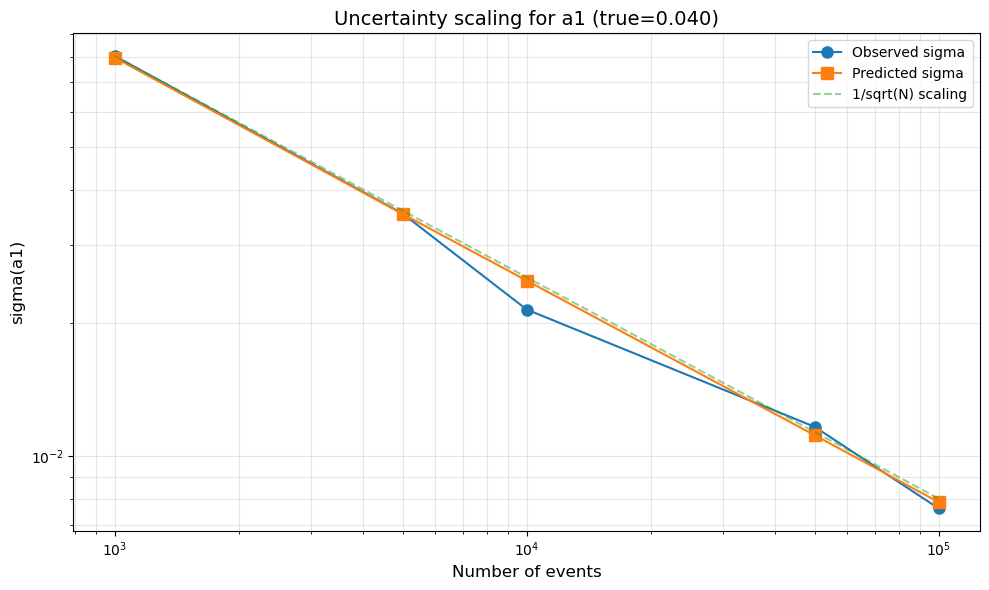

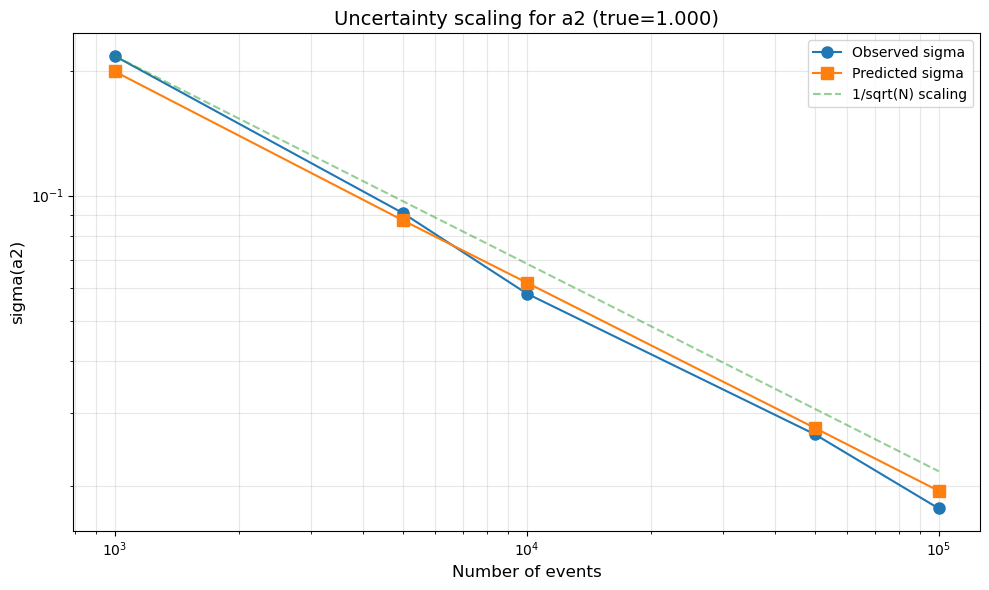

Analysing N = 50000
 counts per bin: 5000.0 (target >= 25)
  Successful fits: 80/80
  a1: true=0.0400, mean=0.0399, obs std=0.0104, pred std=0.0112
  a2: true=1.0000, mean=0.9978, obs std=0.0240, pred std=0.0279
  Mean chi2/ndf=0.894, Poisson dev/ndf=0.894
  Median p-values: chi2=0.508, bootstrap=0.658
[n_bins=10]  a1: obs=0.01045, pred=0.01118 | a2: obs=0.02402, pred=0.02794 | chi2/ndf=0.894, dev/ndf=0.894 | median p=(chi2 0.508, boot 0.658) | counts/bin≈5000.0 | success=100.00%
Analysing N = 50000
 counts per bin: 2500.0 (target >= 25)
  Successful fits: 80/80
  a1: true=0.0400, mean=0.0408, obs std=0.0108, pred std=0.0112
  a2: true=1.0000, mean=1.0049, obs std=0.0305, pred std=0.0276
  Mean chi2/ndf=0.950, Poisson dev/ndf=0.950
  Median p-values: chi2=0.520, bootstrap=0.633
[n_bins=20]  a1: obs=0.01080, pred=0.01117 | a2: obs=0.03051, pred=0.02764 | chi2/ndf=0.950, dev/ndf=0.950 | median p=(chi2 0.520, boot 0.633) | counts/bin≈2500.0 | success=100.00%
Analysing N = 50000
 counts pe

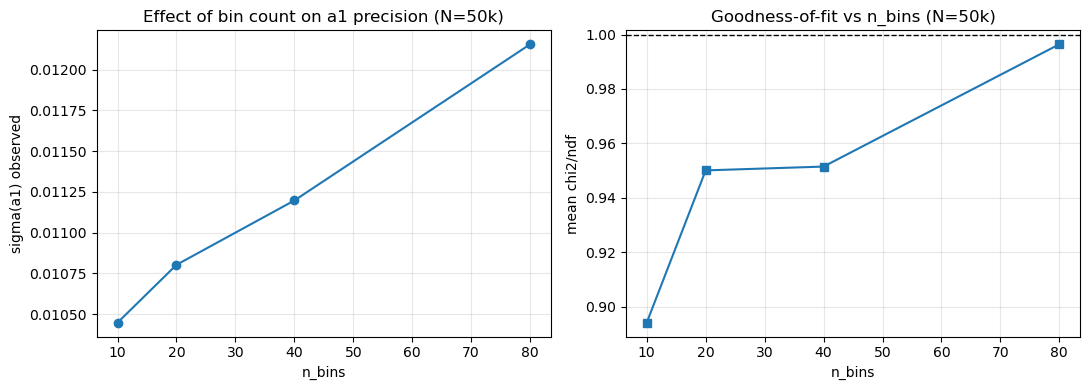

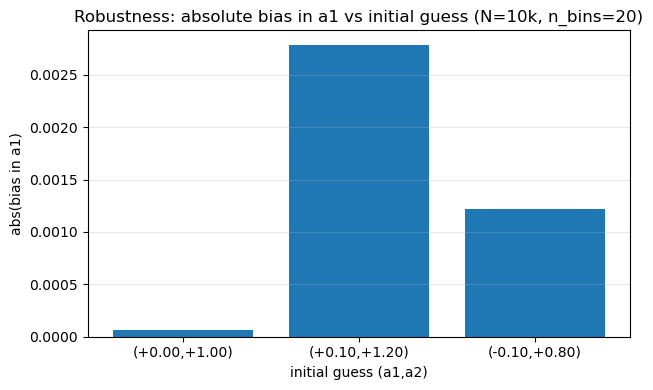

In [5]:


a1_LEP = 0.04
a2_LEP = 1.0

a1_PETRA = 0.4  
a2_PETRA = 1.0

n_events_list = [1_000, 5_000, 10_000, 50_000, 100_000]
n_experiments = 100

print("="*70)
print("LEP-LIKE PARAMETERS (a1=0.04, a2=1.0)")
print("="*70)

# Study A_FB method
print("="*70)
print("METHOD 1: FORWARD-BACKWARD ASYMMETRY")
print("="*70)
results_afb_lep = study_afb_method(a1_LEP, a2_LEP, n_events_list, n_experiments)

# PETRA case
print("="*70)
print("PETRA-LIKE PARAMETERS (a1=0.4, a2=1.0)")
print("="*70)

print("="*70)
print("METHOD 1: FORWARD-BACKWARD ASYMMETRY")
print("="*70)
results_afb_petra = study_afb_method(a1_PETRA, a2_PETRA, n_events_list[:3], n_experiments)

#  Run the Binned Fit Analysis - LEP Parameters
print("="*70)
print("BINNED FIT METHOD2 - LEP-LIKE PARAMETERS (a1=0.04, a2=1.0)")
print("="*70)

results_binned_lep, fitter = study_binned_fit_method(
    a1_LEP, a2_LEP, 
    n_events_list=[1_000, 5_000, 10_000, 50_000, 100_000],
    n_experiments=100,
    n_bins=20
)

#  Run the Binned Fit Analysis - PETRA Parameters
print("="*70)
print("BINNED FIT METHOD2 - PETRA-LIKE PARAMETERS (a1=0.4, a2=1.0)")
print("="*70)

results_binned_petra, fitter = study_binned_fit_method(
    a1_PETRA, a2_PETRA, 
    n_events_list=[1_000, 5_000, 10_000],
    #  lower energies, such as those used at the PETRA
#collider at DESY in the 1980s, a1 could be 10 times as large as on the Z peak at LEP. However,
#those experiments collected much smaller data samples than LEP, so would suffer greater statistical
#uncecrtainties
    n_experiments=100,
    n_bins=20
)



def sweep_n_bins_for_precision(a1_true=0.04, a2_true=1.0,
                               N_fixed=50_000, n_bins_list=(10, 20, 40, 80),
                               n_experiments=80):
    """Study how the bin count affects precision and GoF at a fixed event total."""
    rows = []
    for nb in n_bins_list:
        res_nb, _ = study_binned_fit_method(
            a1_true, a2_true,
            n_events_list=[N_fixed],
            n_experiments=n_experiments,
            n_bins=nb
        )
        if N_fixed not in res_nb :
            print(f"[n_bins={nb}] WARNING: no successful fits at N={N_fixed}")
            continue
        r = res_nb[N_fixed]
        success_rate = r.get('successful_fits', 0) / float(n_experiments)
        rows.append(dict(
            n_bins=nb,
            a1_std_obs=r['a1_std_observed'],
            a1_std_pred=r['a1_std_predicted'],
            a2_std_obs=r['a2_std_observed'],
            a2_std_pred=r['a2_std_predicted'],
            chi2_reduced_mean=r['chi2_reduced_mean'],
            poisson_dev_reduced_mean=r['poisson_deviance_reduced_mean'],
            chi2_pvalue_median=r['chi2_pvalue_median'],
            bootstrap_pvalue_median=r['bootstrap_pvalue_median'],
            counts_per_bin_est=r['counts_per_bin_est'],
            success_rate=success_rate
        ))
        print(f"[n_bins={nb:>2}]  a1: obs={r['a1_std_observed']:.5f}, pred={r['a1_std_predicted']:.5f} | "
              f"a2: obs={r['a2_std_observed']:.5f}, pred={r['a2_std_predicted']:.5f} | "
              f"chi2/ndf={r['chi2_reduced_mean']:.3f}, dev/ndf={r['poisson_deviance_reduced_mean']:.3f} | "
              f"median p=(chi2 {r['chi2_pvalue_median']:.3f}, boot {r['bootstrap_pvalue_median']:.3f}) | "
              f"counts/bin≈{r['counts_per_bin_est']:.1f} | success={success_rate:.2%}")
    return rows


def robustness_to_initial_guess(a1_true=0.04, a2_true=1.0,
                                N_fixed=10_000, n_bins=20,
                                guesses=((0.0, 1.0), (0.1, 1.2), (-0.1, 0.8)),
                                n_experiments=80):
    """Test robustness of the binned fit given different starting points."""
    rows = []
    fitter_local = BinnedFitAnalysis(n_bins=n_bins)

    for (g1, g2) in guesses:
        a1_vals, a2_vals, chi2r_vals = [], [], []
        succ = 0
        for _ in range(n_experiments):
            gen = sampleGen(a1_true, a2_true)
            cos_vals = gen.generate_events(N_fixed)
            fit_out = fitter_local.fit_binned_data(cos_vals, initial_guess=(g1, g2))
            if fit_out[0] is None:
                continue
            a1_fit, a2_fit, _, _, chi2_val, ndf = fit_out[:6]
            a1_vals.append(a1_fit)
            a2_vals.append(a2_fit)
            chi2r_vals.append(chi2_val / ndf)
            succ += 1

        if succ > 0:
            a1_arr = np.array(a1_vals); a2_arr = np.array(a2_vals); chi2r = np.array(chi2r_vals)
            a1_mean = float(np.mean(a1_arr)); a2_mean = float(np.mean(a2_arr))
            rows.append(dict(
                init_a1=g1, init_a2=g2,
                a1_mean=a1_mean,
                a1_bias=(a1_mean - a1_true),
                a2_mean=a2_mean,
                a2_bias=(a2_mean - a2_true),
                a1_std_obs=float(np.std(a1_arr)),
                a2_std_obs=float(np.std(a2_arr)),
                chi2_reduced_mean=float(np.mean(chi2r)),
                success_rate=succ/float(n_experiments)
            ))
            print(f"[init=({g1:+.2f},{g2:+.2f})]  "
                  f"a1_mean={a1_mean:.5f} (bias {a1_mean - a1_true:+.2e}), "
                  f"a2_mean={a2_mean:.5f} (bias {a2_mean - a2_true:+.2e}), "
                  f"chi2/ndf={np.mean(chi2r):.3f}, success={succ/n_experiments:.2%}")
        else:
            rows.append(dict(
                init_a1=g1, init_a2=g2,
                a1_mean=np.nan, a1_bias=np.nan,
                a2_mean=np.nan, a2_bias=np.nan,
                a1_std_obs=np.nan, a2_std_obs=np.nan,
                chi2_reduced_mean=np.nan, success_rate=0.0
            ))
            print(f"[init=({g1:+.2f},{g2:+.2f})]  no successful fits.")
    return rows




# 1) Plot uncertainty scaling for a1 and a2 (observed vs predicted vs 1/sqrt(N))
plot_uncertainty_scaling(results_binned_lep, a1_true=a1_LEP, a2_true=a2_LEP, parameter='a1')
plot_uncertainty_scaling(results_binned_lep, a1_true=a1_LEP, a2_true=a2_LEP, parameter='a2')
# 2) Sensitivity to number of bins at fixed N
n_bins_sweep_rows = sweep_n_bins_for_precision(
    a1_true=a1_LEP, a2_true=a2_LEP,
    N_fixed=50_000,                     
    n_bins_list=(10, 20, 40, 80),       
    n_experiments=80
)

# 3) Robustness to different initial guesses at fixed N
robust_init_rows = robustness_to_initial_guess(
    a1_true=a1_LEP, a2_true=a2_LEP,
    N_fixed=10_000,                     # moderate N where fits are still quick
    n_bins=20,
    guesses=((0.0, 1.0), (0.10, 1.20), (-0.10, 0.80)),
    n_experiments=80
)



df_bins = pd.DataFrame(n_bins_sweep_rows)
df_inits = pd.DataFrame(robust_init_rows)

# Plot effect of n_bins on a1 observed precision and mean chi2/ndf
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
ax[0].plot(df_bins['n_bins'], df_bins['a1_std_obs'], 'o-')
ax[0].set_xlabel('n_bins'); ax[0].set_ylabel('sigma(a1) observed')
ax[0].set_title('Effect of bin count on a1 precision (N=50k)'); ax[0].grid(True, alpha=0.3)

ax[1].plot(df_bins['n_bins'], df_bins['chi2_reduced_mean'], 's-')
ax[1].axhline(1.0, ls='--', c='k', lw=1)
ax[1].set_xlabel('n_bins'); ax[1].set_ylabel('mean chi2/ndf')
ax[1].set_title('Goodness-of-fit vs n_bins (N=50k)'); ax[1].grid(True, alpha=0.3)

plt.tight_layout(); plt.show()

# Plot robustness to different initial guesses
plt.figure(figsize=(6.5,4))
labels = [f"({r['init_a1']:+.2f},{r['init_a2']:+.2f})" for r in robust_init_rows]
vals = [abs(r['a1_bias']) for r in robust_init_rows]
plt.bar(labels, vals)
plt.ylabel('abs(bias in a1)'); plt.xlabel('initial guess (a1,a2)')
plt.title('Robustness: absolute bias in a1 vs initial guess (N=10k, n_bins=20)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout(); plt.show()


# Figures 6-9 shown below


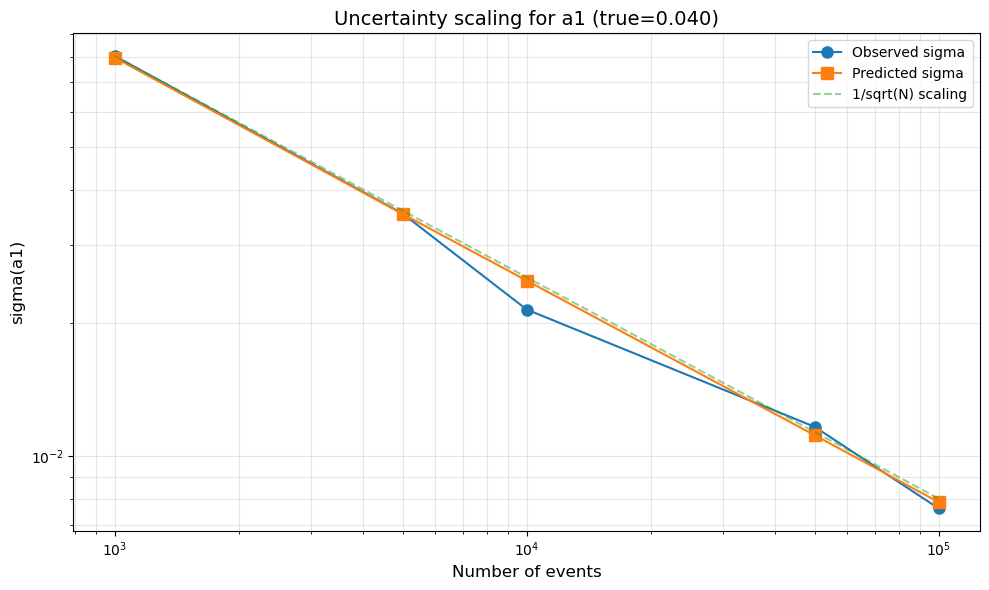

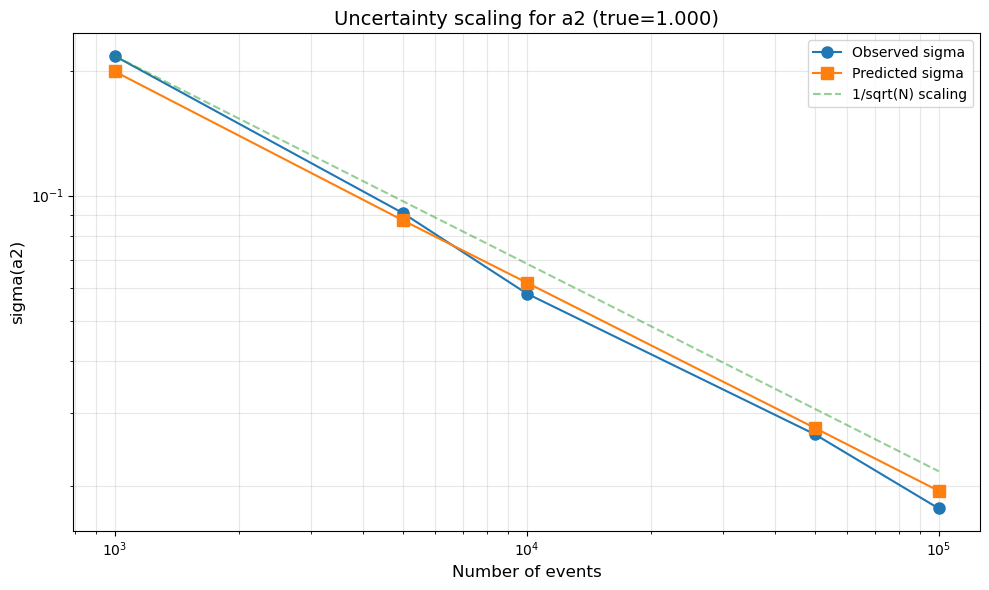

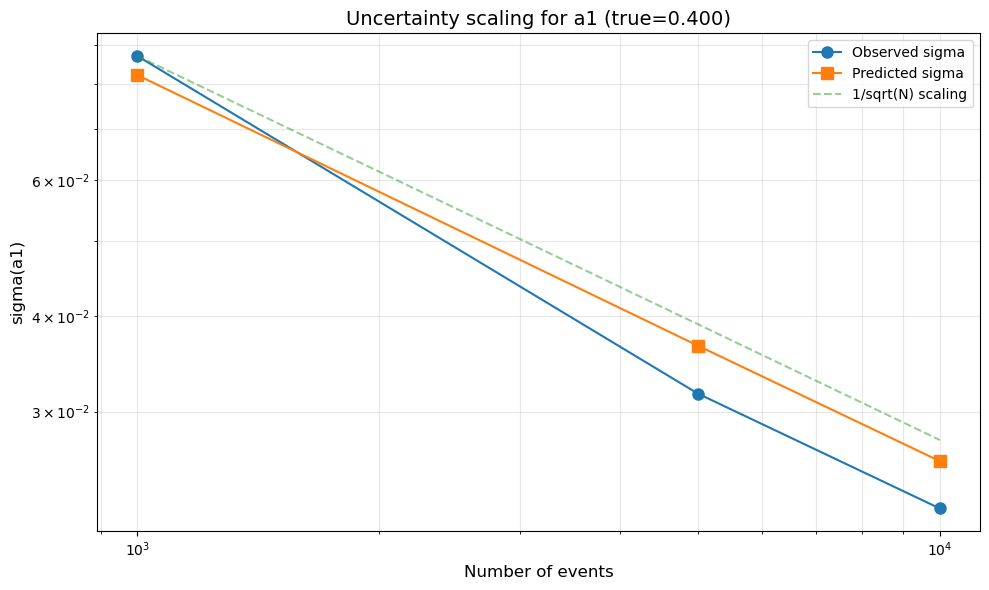

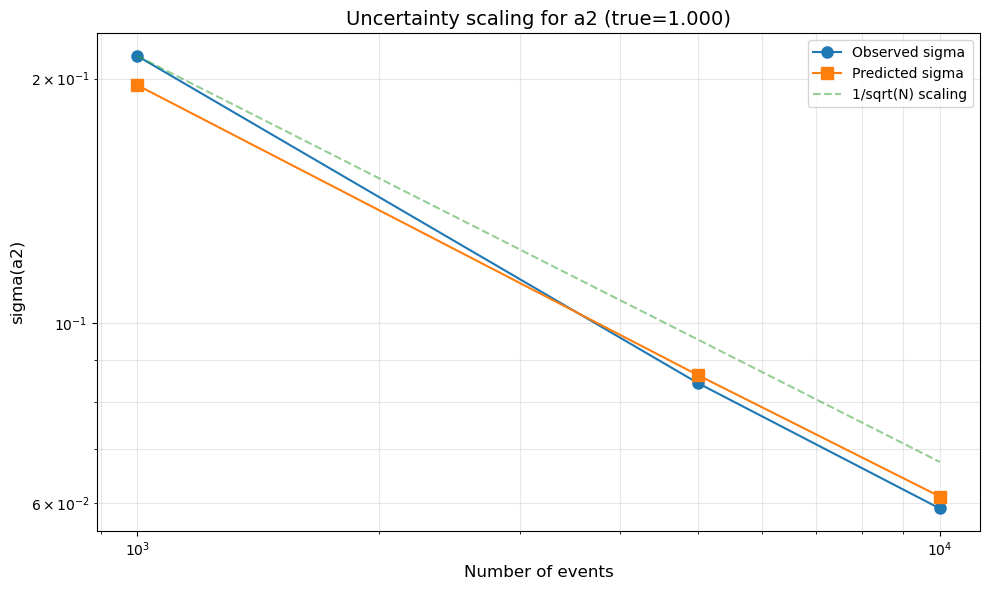

In [6]:
# Plot Uncertainty Scaling for a1
plot_uncertainty_scaling(results_binned_lep, a1_LEP, a2_LEP, parameter='a1')
# Plot Uncertainty Scaling for a2
plot_uncertainty_scaling(results_binned_lep, a1_LEP, a2_LEP, parameter='a2')
# Plot Uncertainty Scaling for a1
plot_uncertainty_scaling(results_binned_petra, a1_PETRA, a2_PETRA, parameter='a1')
# Plot Uncertainty Scaling for a2
plot_uncertainty_scaling(results_binned_petra, a1_PETRA, a2_PETRA, parameter='a2')


This section performs a closure test to verify that the binned chi-square fitting method can accurately recover the true input parameters (a1, a2) from simulated angular data.


# Figure 10 shown below

Fitted a1 = 0.0970 +/- 0.0248
Fitted a2 = 0.9795 +/- 0.0612
chi^2/ndf = 13.79/18 = 0.766  (p=0.743)
Poisson deviance/ndf = 0.764, bootstrap p ≈ 0.824


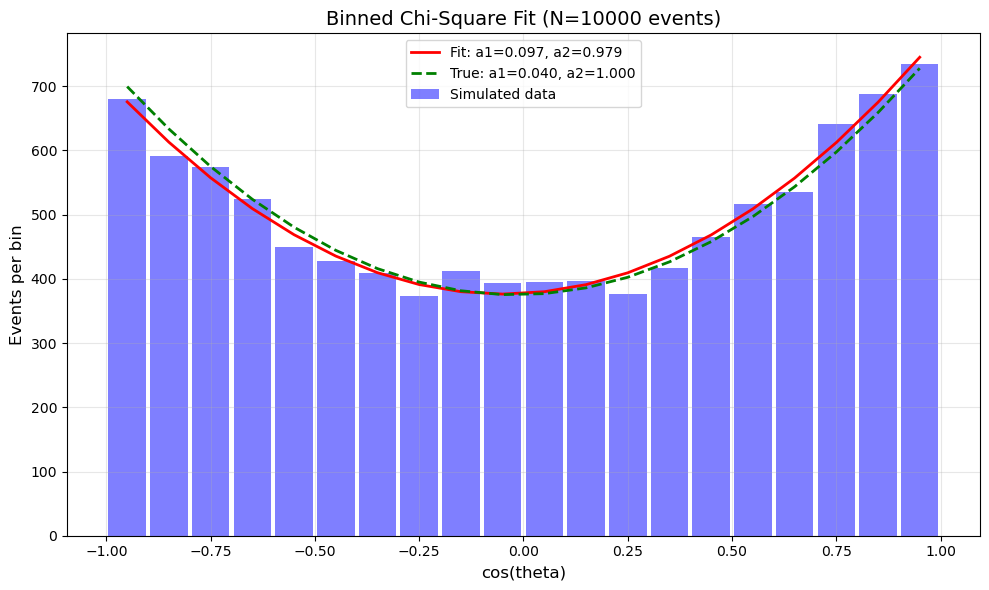

In [7]:


gen = sampleGen(a1_LEP, a2_LEP)
sample = gen.generate_events(10_000)
fit_out = fitter.fit_binned_data(sample)
(a1_fit, a2_fit, a1_err, a2_err,
 chi2_val, ndf, chi2_p, poisson_dev, bootstrap_p) = fit_out
print(f"Fitted a1 = {a1_fit:.4f} +/- {a1_err:.4f}")
print(f"Fitted a2 = {a2_fit:.4f} +/- {a2_err:.4f}")
print(f"chi^2/ndf = {chi2_val:.2f}/{ndf} = {chi2_val/ndf:.3f}  (p={chi2_p:.3f})")
print(f"Poisson deviance/ndf = {poisson_dev/ndf:.3f}, bootstrap p ≈ {bootstrap_p:.3f}")
fitter.plot_fit(sample, a1_fit, a2_fit, a1_LEP, a2_LEP)


# Step 3: Acceptance and angular resolution study

The aim of this part of my project was to study how realistic detector effects change the precision of estimating the physics parameter a1 in the angular model
f(x) = 1 + a1x + a2x^2, where x = cos(theta).

To do this, I introduced two key detector effects that are present in real experiments:

Acceptance: I only kept events where |cos(theta_meas)| < cmax.

Angular resolution: I smeared the true polar angle theta with a Gaussian of width sigma_theta (in radians) before converting back to cos(theta).

I then compared two different ways of estimating a1 using the same smeared and accepted data


## For each N, the console prints:

- The mean fitted a1 value (to check for bias).

- The observed sigma, which is the actual spread in fitted a1 values.

- The predicted sigma from the fitting method.

- The ratio of observed to predicted uncertainties, which should be close to 1 if the method's uncertainty estimates are reliable.

- The plots show sigma(a1) versus N for both methods, with separate lines for observed and predicted values. The trend should roughly follow 1/sqrt(N), which confirms the expected statistical behaviour.

## Configurations I ran in this study:

LEP-like setup:
a1_true = 0.04, a2_true = 1.0
cmax = 0.9 (representing limited detector acceptance)
sigma_theta = 0.003 rad (about 3 mrad angular resolution)
N = 10,000; 50,000; 100,000
repeats = 50, n_bins = 40

PETRA-like setup:
a1_true = 0.4, a2_true = 1.0
cmax = 0.95 (wider acceptance)
sigma_theta = 0.007 rad (about 7 mrad resolution)
N = 10,000; 50,000; 100,000
repeats = 50, n_bins = 40

These two configurations allowed me to directly compare how different detector conditions (acceptance and angular resolution) influence the precision with which a1 can be measured at different centre-of-mass energies.

# Figures 11- 14 shown below

  Note: the truncated A_FB -> a1 mapping ignores smearing, so the propagated sigma is mildly optimistic.

N=10000, cmax=0.9, sigma_theta=0.003 rad
  AFB: mean=0.04374, obs sigma=0.02712, pred sigma=0.03048, ratio=0.890
  BIN: mean=0.04337, obs sigma=0.02523, pred sigma=0.02819, ratio=0.895

N=50000, cmax=0.9, sigma_theta=0.003 rad
  AFB: mean=0.04183, obs sigma=0.01493, pred sigma=0.01363, ratio=1.095
  BIN: mean=0.04247, obs sigma=0.01401, pred sigma=0.01263, ratio=1.110

N=100000, cmax=0.9, sigma_theta=0.003 rad
  AFB: mean=0.03829, obs sigma=0.00873, pred sigma=0.00964, ratio=0.905
  BIN: mean=0.03814, obs sigma=0.00815, pred sigma=0.00893, ratio=0.913


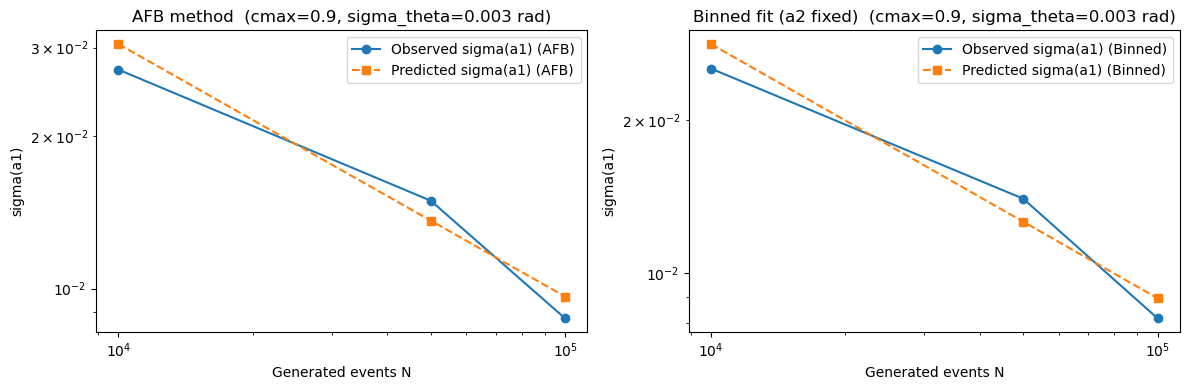

  Note: the truncated A_FB -> a1 mapping ignores smearing, so the propagated sigma is mildly optimistic.

N=10000, cmax=0.95, sigma_theta=0.007 rad
  AFB: mean=0.40175, obs sigma=0.02825, pred sigma=0.02813, ratio=1.004
  BIN: mean=0.40243, obs sigma=0.02527, pred sigma=0.02599, ratio=0.972

N=50000, cmax=0.95, sigma_theta=0.007 rad
  AFB: mean=0.39933, obs sigma=0.01193, pred sigma=0.01259, ratio=0.948
  BIN: mean=0.39931, obs sigma=0.01059, pred sigma=0.01164, ratio=0.909

N=100000, cmax=0.95, sigma_theta=0.007 rad
  AFB: mean=0.40005, obs sigma=0.00923, pred sigma=0.00890, ratio=1.037
  BIN: mean=0.40038, obs sigma=0.00866, pred sigma=0.00824, ratio=1.051


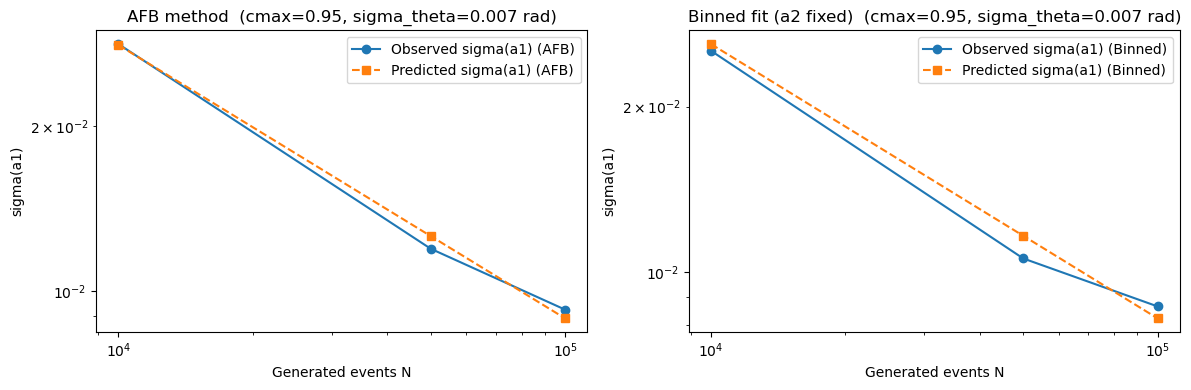

In [8]:
# tep 3: Acceptance (|cos(theta)| < cmax) and angular resolution (sigma_theta) study 



def smear_and_accept(cos_theta_true, sigma_theta=0.003, cmax=0.9, rng=None):
    """
    Apply angular smearing in theta (Gaussian with width sigma_theta in radians),
    then apply acceptance on the measured angle: |cos(theta_meas)| < cmax.
    Returns the measured cos(theta) values that pass acceptance.

    Parameters
    ----------
    cos_theta_true : array-like
        The true cos(theta) values drawn from the physics model.
    sigma_theta : float, optional
        The Gaussian angular resolution in radians applied to theta. Default 0.003.
    cmax : float, optional
        The acceptance limit on the measured cosine. Events are kept if
        abs(cos(theta_meas)) < cmax. Default 0.9.
    rng : numpy.random.Generator or None, optional
        Random number generator to use. If None, a fresh default_rng() is created.

    Returns
    -------
    numpy.ndarray
        The array of measured cos(theta) values that survive the acceptance cut.
    """
    if rng is None:
        rng = np.random.default_rng()

    # Convert true cos(theta) to true theta
    theta_true = np.arccos(np.clip(cos_theta_true, -1.0, 1.0))

    # Apply Gaussian smearing in theta
    theta_meas = theta_true + rng.normal(0.0, sigma_theta, size=theta_true.shape)

    # Keep theta in [0, pi]
    theta_meas = np.clip(theta_meas, 0.0, np.pi)

    # Convert back to cos(theta)
    cos_meas = np.cos(theta_meas)

    # Acceptance on the measured cosine
    keep = np.abs(cos_meas) < cmax
    return cos_meas[keep]


def afb_to_a1_truncated(A_FB, a2, cmax):
    """
    Map A_FB (measured within |cos(theta)| < cmax) to a1, assuming only truncation.
    Derivation by integrating 1 + a1*x + a2*x^2 over [-c, c]:
        sigma_F - sigma_B = a1 * c^2
        sigma_F + sigma_B = 2c + (2 a2 / 3) c^3
        A_FB(c) = (a1 c^2) / (2c + (2 a2 / 3) c^3) = a1 * c / (2 + (2 a2 / 3) c^2)
        => a1 = A_FB * (2 + (2 a2 / 3) c^2) / c

    Parameters
    ----------
    A_FB : float
        Forward-backward asymmetry measured in the truncated region.
    a2 : float
        Fixed quadratic coefficient used in the mapping.
    cmax : float
        Acceptance limit on |cos(theta)|.

    Returns
    -------
    float
        The a1 value corresponding to the measured A_FB under the truncated mapping.
    """
    return A_FB * (2.0 + (2.0 * a2 / 3.0) * (cmax**2)) / cmax


def fit_binned_with_acceptance(cos_theta_meas, a2_fixed, cmax=0.9, n_bins=40):
    """
    Perform a binned fit for a1 with fixed a2 over the acceptance window [-cmax, cmax].
    Uses equal-width bins and the exact integral of the quadratic to predict the
    expected counts per bin. Fits by Poisson-weighted least squares via curve_fit.

    Parameters
    ----------
    cos_theta_meas : array-like
        Measured cos(theta) values that have already passed the acceptance cut.
    a2_fixed : float
        The a2 coefficient held fixed during the fit.
    cmax : float, optional
        Acceptance half-range for the histogram. Default 0.9.
    n_bins : int, optional
        Number of equal-width bins on [-cmax, cmax]. Default 40.

    Returns
    -------
    (float, float)
        Tuple (a1_hat, a1_err). Returns (nan, nan) if the fit cannot be performed.
    """
    if len(cos_theta_meas) < max(50, n_bins):
        return np.nan, np.nan

    # Histogram within the acceptance window
    counts, edges = np.histogram(cos_theta_meas, bins=n_bins, range=(-cmax, cmax))
    centers = 0.5 * (edges[:-1] + edges[1:])
    # Poisson errors; avoid zero by flooring to 1.0 for empty bins
    sigma = np.sqrt(np.maximum(counts, 1.0))

    # Exact integral of 1 + a1*x + a2*x^2 over a bin [x0, x1]
    def bin_integral(a1, a2, x0, x1):
        return ((x1 - x0)
                + 0.5 * a1 * (x1**2 - x0**2)
                + (a2 / 3.0) * (x1**3 - x0**3))

    # Normalisation over [-cmax, cmax]; the a1 term integrates to zero by symmetry
    norm = bin_integral(0.0, a2_fixed, -cmax, cmax)

    # Expected counts model: N_total * (integral over bin / integral over acceptance)
    Ntot = len(cos_theta_meas)

    def expected_counts_model(x_centers, a1_free):
        exp = np.empty_like(counts, dtype=float)
        for i in range(len(counts)):
            x0, x1 = edges[i], edges[i + 1]
            I = bin_integral(a1_free, a2_fixed, x0, x1)
            exp[i] = Ntot * I / norm
        return exp

    try:
        popt, pcov = curve_fit(
            expected_counts_model,
            xdata=centers,
            ydata=counts,
            sigma=sigma,
            p0=[0.0],              # near-zero asymmetry as  starting point
            absolute_sigma=True,
            maxfev=10000
        )
        a1_hat = popt[0]
        a1_err = float(np.sqrt(pcov[0, 0])) if pcov.size else np.nan
        return a1_hat, a1_err
    except Exception:
        return np.nan, np.nan


def study_acceptance_and_resolution(a1_true, a2_true,
                                    N_list=(10_000, 50_000, 100_000),
                                    repeats=50,
                                    cmax=0.9,
                                    sigma_theta=0.003,
                                    n_bins=40,
                                    rng=None):
    """
    Study the impact of detector angular resolution and acceptance on the precision of a1.

    For each N in N_list:
      1) Generate N true events (cos(theta) on the full range [-1, 1]).
      2) Smear theta by a Gaussian with width sigma_theta and keep only events
         with abs(cos(theta_meas)) < cmax (acceptance on the measured angle).
      3) Estimate a1 using:
           (A) A_FB with the truncated mapping a1(A_FB, cmax) and delta-method errors.
           (B) A binned fit on [-cmax, cmax] with a2 fixed.
      4) Collect observed standard deviations of a1 and compare with the predicted
         ones for both methods.

    Parameters
    ----------
    a1_true : float
        The true a1 used to generate events.
    a2_true : float
        The true a2 used to generate events and to fix in the binned fit.
    N_list : sequence of int
        List of generated event counts to test. Default (10k, 50k, 100k).
    repeats : int
        Number of pseudo-experiments per N. Default 50.
    cmax : float
        Acceptance half-range on |cos(theta_meas)|. Default 0.9.
    sigma_theta : float
        Gaussian angular resolution in radians. Default 0.003.
    n_bins : int
        Number of bins used by the binned fit within [-cmax, cmax]. Default 40.
    rng : numpy.random.Generator or None, optional
        Random number generator to use in smearing and any other stochastic steps.
        If None, a fixed seeding default_rng(123) is used to make the study reproducible.

    Returns
    -------
    list of dict
        One summary dictionary per N with observed and predicted dispersions
        for both A_FB and the binned fit, including simple ratios obs/pred.
    """
    if rng is None:
        rng = np.random.default_rng(123)

    summaries = []
    smear_warning_issued = False

    for N in N_list:
        a1_afb_vals, a1_afb_predsig = [], []
        a1_bin_vals, a1_bin_predsig = [], []

        for _ in range(repeats):
            # Generate truth over the full domain [-1, 1]
            gen = sampleGen(a1_true, a2_true)
            cos_true = gen.generate_events(N)

            # Detector: smear and accept on the measured cosine
            cos_meas = smear_and_accept(cos_true, sigma_theta=sigma_theta, cmax=cmax, rng=rng)
            Neff = len(cos_meas)

            # Skip  cases with too few accepted events
            if Neff < max(30, n_bins):
                continue

            #  A_FB method on accepted measured values
            # calculate_afb should return (A_FB, sigma_A_FB) with sigma approx sqrt((1 - A_FB^2)/Neff)
            A_FB, sigma_A_FB = calculate_afb(cos_meas)
            a1_from_afb = afb_to_a1_truncated(A_FB, a2_true, cmax)

            # Propagate uncertainty: a1 = k * A_FB
            k = (2.0 + (2.0 * a2_true / 3.0) * (cmax**2)) / cmax
            sigma_a1_from_afb = k * sigma_A_FB
            if sigma_theta > 0 and not smear_warning_issued:
                print("  Note: the truncated A_FB -> a1 mapping ignores smearing, so the propagated sigma is mildly optimistic.")
                smear_warning_issued = True

            a1_afb_vals.append(a1_from_afb)
            a1_afb_predsig.append(sigma_a1_from_afb)

            # (B) Binned fit with acceptance (fit a1, fix a2)
            a1_hat, a1_err = fit_binned_with_acceptance(
                cos_meas, a2_fixed=a2_true, cmax=cmax, n_bins=n_bins
            )
            if np.isfinite(a1_hat):
                a1_bin_vals.append(a1_hat)
                if np.isfinite(a1_err):
                    a1_bin_predsig.append(a1_err)

        
        def agg(arr):
            return (np.nan if len(arr) == 0 else float(np.mean(arr)),
                    np.nan if len(arr) == 0 else float(np.std(arr)))

        a1_afb_mean, a1_afb_std = agg(a1_afb_vals)
        a1_bin_mean, a1_bin_std = agg(a1_bin_vals)

        a1_afb_pred = (np.nan if len(a1_afb_predsig) == 0 else float(np.mean(a1_afb_predsig)))
        a1_bin_pred = (np.nan if len(a1_bin_predsig) == 0 else float(np.mean(a1_bin_predsig)))

        summaries.append({
            "N_generated": N,
            "cmax": cmax,
            "sigma_theta": sigma_theta,
            # A_FB results
            "a1_afb_mean": a1_afb_mean,
            "a1_afb_std_obs": a1_afb_std,
            "a1_afb_std_pred": a1_afb_pred,
            "afb_ratio_obs_over_pred":
                (a1_afb_std / a1_afb_pred) if (a1_afb_pred and not np.isnan(a1_afb_pred)) else np.nan,
            # Binned fit results
            "a1_bin_mean": a1_bin_mean,
            "a1_bin_std_obs": a1_bin_std,
            "a1_bin_std_pred": a1_bin_pred,
            "bin_ratio_obs_over_pred":
                (a1_bin_std / a1_bin_pred) if (a1_bin_pred and not np.isnan(a1_bin_pred)) else np.nan,
        })

        
        print(f"\nN={N}, cmax={cmax}, sigma_theta={sigma_theta} rad")
        print(f"  AFB: mean={a1_afb_mean:.5f}, obs sigma={a1_afb_std:.5f}, "
              f"pred sigma={a1_afb_pred:.5f}, ratio={summaries[-1]['afb_ratio_obs_over_pred']:.3f}")
        print(f"  BIN: mean={a1_bin_mean:.5f}, obs sigma={a1_bin_std:.5f}, "
              f"pred sigma={a1_bin_pred:.5f}, ratio={summaries[-1]['bin_ratio_obs_over_pred']:.3f}")

    # Plots: sigma(a1) vs N for AFB and Binned (observed vs predicted)
    Ns = np.array([s["N_generated"] for s in summaries], dtype=float)

    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

    # AFB panel
    ax[0].plot(Ns, [s["a1_afb_std_obs"] for s in summaries], "o-", label="Observed sigma(a1) (AFB)")
    ax[0].plot(Ns, [s["a1_afb_std_pred"] for s in summaries], "s--", label="Predicted sigma(a1) (AFB)")
    ax[0].set_xscale("log"); ax[0].set_yscale("log")
    ax[0].set_xlabel("Generated events N"); ax[0].set_ylabel("sigma(a1)")
    ax[0].set_title(f"AFB method  (cmax={cmax}, sigma_theta={sigma_theta} rad)")
    ax[0].legend()

    # Binned panel
    ax[1].plot(Ns, [s["a1_bin_std_obs"] for s in summaries], "o-", label="Observed sigma(a1) (Binned)")
    ax[1].plot(Ns, [s["a1_bin_std_pred"] for s in summaries], "s--", label="Predicted sigma(a1) (Binned)")
    ax[1].set_xscale("log"); ax[1].set_yscale("log")
    ax[1].set_xlabel("Generated events N"); ax[1].set_ylabel("sigma(a1)")
    ax[1].set_title(f"Binned fit (a2 fixed)  (cmax={cmax}, sigma_theta={sigma_theta} rad)")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    return summaries



a1_LEP, a2_LEP = 0.04, 1.0
summaries_step3 = study_acceptance_and_resolution(
    a1_true=a1_LEP,
    a2_true=a2_LEP,
    N_list=(10_000, 50_000, 100_000),
    repeats=50,
    cmax=0.9,          
    sigma_theta=0.003,  
    n_bins=40
)

summaries_step3_petra = study_acceptance_and_resolution(
    a1_true=0.4,
    a2_true=a2_LEP,
    N_list=(10_000, 50_000, 100_000),
    repeats=50,
    cmax=0.95,           
    sigma_theta=0.007, 
    n_bins=40
)


#  Compare AFB vs Binned Fit vs Unbinned MLE
Simulates angular data x = cos(theta) from the model 1 + a1 x + a2 x^2.

Optionally applies detector effects:

Gaussian smearing in theta with width sigma_theta (radians),

acceptance cut: keep only events with abs(cos theta) < cmax.

Estimates a1 using three methods, all on the same smeared/accepted sample:

AFB: forward-backward asymmetry, then mapped to a1 for finite acceptance.

Binned chi-square fit for a1 with a2 fixed (exact bin integrals).

Unbinned MLE for a1 with a2 fixed (proper normalisation over [-cmax, cmax]).

Repeats the experiment many times; for each N, reports:

mean a1 (bias check), observed scatter sigma(a1), and the typical predicted error,

ratios observed/predicted for each method (should be near 1 if estimates are efficient).

Plots observed and predicted sigma(a1) versus N for the three methods.

#  figures 15 -18 shown below


N=10000, cmax=1.0, sigma_theta=0.0 rad
  AFB: mean=0.03426,  obs sigma=0.02672, pred sigma=0.02666, ratio=1.002
  BIN: mean=0.03376,  obs sigma=0.02396, pred sigma=0.02490, ratio=0.962
  MLE: mean=0.03387,  obs sigma=0.02352, pred sigma=0.02491, ratio=0.944

N=50000, cmax=1.0, sigma_theta=0.0 rad
  AFB: mean=0.04300,  obs sigma=0.01066, pred sigma=0.01192, ratio=0.894
  BIN: mean=0.04249,  obs sigma=0.01070, pred sigma=0.01114, ratio=0.960
  MLE: mean=0.04247,  obs sigma=0.01061, pred sigma=0.01115, ratio=0.951

N=100000, cmax=1.0, sigma_theta=0.0 rad
  AFB: mean=0.03837,  obs sigma=0.00765, pred sigma=0.00843, ratio=0.907
  BIN: mean=0.03825,  obs sigma=0.00720, pred sigma=0.00788, ratio=0.913
  MLE: mean=0.03822,  obs sigma=0.00723, pred sigma=0.00788, ratio=0.918


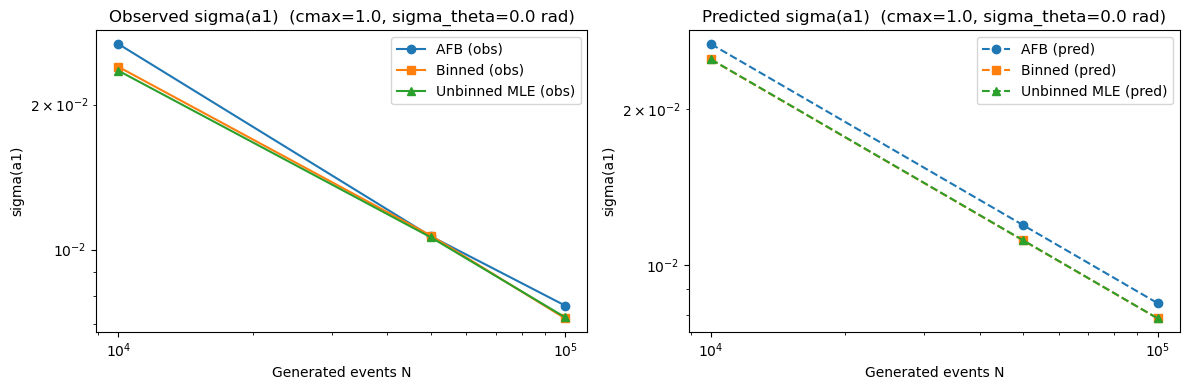


N=10000, cmax=0.9, sigma_theta=0.003 rad
  AFB: mean=0.04232,  obs sigma=0.03201, pred sigma=0.03048, ratio=1.050
  BIN: mean=0.04029,  obs sigma=0.03147, pred sigma=0.02820, ratio=1.116
  MLE: mean=0.03999,  obs sigma=0.03056, pred sigma=0.02823, ratio=1.082

N=50000, cmax=0.9, sigma_theta=0.003 rad
  AFB: mean=0.03972,  obs sigma=0.01390, pred sigma=0.01363, ratio=1.020
  BIN: mean=0.04065,  obs sigma=0.01315, pred sigma=0.01263, ratio=1.042
  MLE: mean=0.04062,  obs sigma=0.01318, pred sigma=0.01263, ratio=1.044

N=100000, cmax=0.9, sigma_theta=0.003 rad
  AFB: mean=0.04031,  obs sigma=0.00969, pred sigma=0.00964, ratio=1.005
  BIN: mean=0.04074,  obs sigma=0.00962, pred sigma=0.00893, ratio=1.078
  MLE: mean=0.04073,  obs sigma=0.00952, pred sigma=0.00893, ratio=1.066


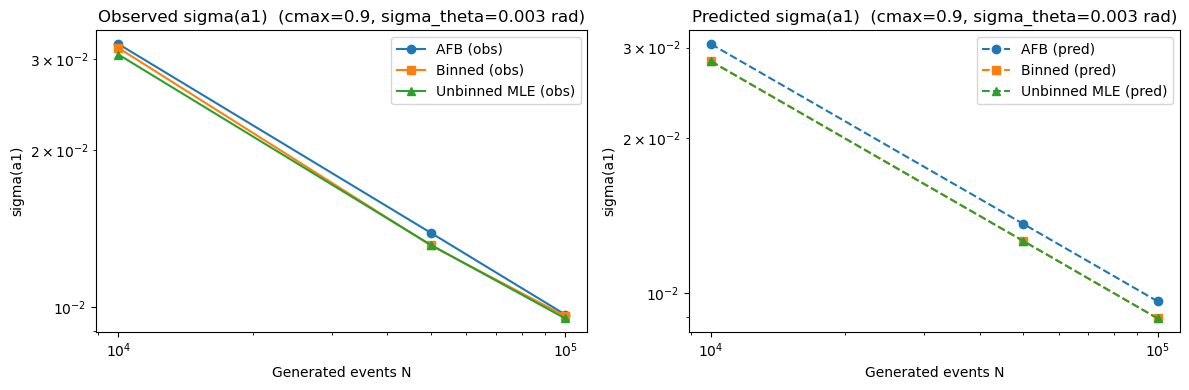

In [9]:
# Compare AFB vs Binned Fit vs Unbinned MLE ( a2 fixed) 


def smear_and_accept_local(cos_theta_true, sigma_theta=0.0, cmax=1.0, rng=None):
    """
    Apply detector effects to true cos(theta) values.

    1) Convert to theta and smear by a Gaussian of width sigma_theta (radians).
    2) Convert back to cos(theta).
    3) Keep only events with abs(cos(theta)_measured) < cmax.

    If sigma_theta == 0.0 and cmax >= 1.0 the input array is returned unchanged.

    Parameters
    ----------
    cos_theta_true : array-like of shape (N,)
        True cos(theta) values sampled from the physics model.
    sigma_theta : float
        Angular smearing standard deviation in radians. Default 0.0.
    cmax : float
        Acceptance boundary in cos(theta). Keep events with abs(cos) < cmax.
        Default 1.0 (full acceptance).
    rng : numpy.random.Generator or None
        Random number generator. If None, a fresh default_rng() is used.

    Returns
    -------
    numpy.ndarray
        Measured cos(theta) values that pass the acceptance requirement.
    """
    if rng is None:
        rng = np.random.default_rng()
    if sigma_theta == 0.0 and cmax >= 1.0:
        return cos_theta_true

    th = np.arccos(np.clip(cos_theta_true, -1.0, 1.0))
    th_meas = th + rng.normal(0.0, sigma_theta, size=th.shape)
    th_meas = np.clip(th_meas, 0.0, np.pi)
    cos_meas = np.cos(th_meas)
    return cos_meas[np.abs(cos_meas) < cmax]


def norm_const_trunc(a1, a2, c):
    """
    Normalisation integral Z over the truncated domain [-c, c] for the model:
        f(x) = 1 + a1*x + a2*x^2

    Note: the a1 term integrates to zero by symmetry, so Z does not depend on a1.

    Parameters
    ----------
    a1 : float
        Linear coefficient (not used in the closed form).
    a2 : float
        Quadratic coefficient.
    c : float
        Half-width of the accepted cos(theta) range, i.e. integrate over [-c, c].

    Returns
    -------
    float
        Z = integral_{-c}^{c} (1 + a1*x + a2*x^2) dx
    """
    return (2.0 * c) + (a2 / 3.0) * ((c**3) - (-c)**3)


def afb_to_a1_truncated(A_FB, a2, c):
    """
    Mapping from forward-backward asymmetry measured in |x|<c to a1.

    Derivation (integrating 1 + a1 x + a2 x**2 over [-c, c]):
      sigma_F - sigma_B = a1 * c**2
      sigma_F + sigma_B = 2c + (2 a2 / 3) * c**3
      A_FB(c) = (a1 * c**2) / (2c + (2 a2 / 3) * c**3) = a1 * c / (2 + (2 a2 / 3) * c**2)
      => a1 = A_FB * (2 + (2 a2 / 3) * c**2) / c

    Note
    ----
    This analytic mapping assumes a sharp acceptance cut with no angular smearing.
    Once resolution effects smear the angles before the |x|<c selection, migrations
    introduce a small bias and the propagated sigma(a1) becomes slightly optimistic.
    The detector studies below flag this caveat whenever smearing is enabled.

    Returns
    -------
    float
        Estimated a1 from A_FB in the truncated domain.
    """
    return A_FB * (2.0 + (2.0 * a2 / 3.0) * c * c) / c


def expected_counts_per_bin_trunc(N, a1, a2, edges):
    """
    Exact expected counts in each histogram bin for |x| <= c, with a2 fixed and a1 free.

    Parameters
    ----------
    N : int
        Total number of accepted events.
    a1 : float
        Linear coefficient to predict.
    a2 : float
        Quadratic coefficient (fixed).
    edges : array-like
        Bin edges on [-c, c].

    Returns
    -------
    numpy.ndarray
        Expected counts per bin, length len(edges) - 1.
    """
    c = max(abs(edges[0]), abs(edges[-1]))
    Z = norm_const_trunc(a1, a2, c)
    out = np.empty(len(edges) - 1, dtype=float)
    for i in range(len(out)):
        a, b = edges[i], edges[i + 1]
        # Integral of 1 + a1*x + a2*x^2 on [a, b]
        I = ((b - a) + 0.5 * a1 * (b * b - a * a) + (a2 / 3.0) * (b**3 - a**3))
        out[i] = N * I / Z
    return out


def binned_fit_a1_fixed_a2(cos_meas, a2_fixed, cmax=1.0, n_bins=40):
    """
    Binned chi-square fit for a1 with a2 fixed over [-cmax, cmax].

    Uses Poisson standard deviations for each bin and an exact model for the
    bin contents (so no bin-centre approximation).

    Parameters
    ----------
    cos_meas : array-like
        Measured cos(theta) after smearing and acceptance.
    a2_fixed : float
        Value of a2 to keep fixed in the fit.
    cmax : float, optional
        Acceptance boundary. Histogram domain is [-cmax, cmax].
    n_bins : int, optional
        Number of equal-width bins.

    Returns
    -------
    (a1_hat, a1_err) : tuple of floats
        Best-fit a1 and its estimated uncertainty from the covariance.
        Returns (nan, nan) if there are too few events or the fit fails.
    """
    if len(cos_meas) < max(50, n_bins):
        return np.nan, np.nan

    edges = np.linspace(-cmax, cmax, n_bins + 1)
    counts, _ = np.histogram(cos_meas, bins=edges)
    centers = 0.5 * (edges[:-1] + edges[1:])  # not used by model, but required by curve_fit
    sigma = np.sqrt(np.maximum(counts, 1.0))
    Ntot = int(np.sum(counts))

    def model(_x_centers, a1_free):
        return expected_counts_per_bin_trunc(Ntot, a1_free, a2_fixed, edges)

    try:
        popt, pcov = curve_fit(
            model, centers, counts, p0=[0.0],
            sigma=sigma, absolute_sigma=True, maxfev=10000
        )
        a1_hat = popt[0]
        a1_err = float(np.sqrt(pcov[0, 0])) if pcov.size else np.nan
        return a1_hat, a1_err
    except Exception:
        return np.nan, np.nan


def unbinned_mle_a1_fixed_a2(cos_meas, a2_fixed, cmax=1.0, p0=0.0):
    """
    Unbinned maximum-likelihood estimate (MLE) for a1 with a2 fixed on [-c, c].

    The normalisation integral over [-c, c] is Z = 2c + (2 a2 / 3) c**3, independent of a1.
    The negative log-likelihood is therefore
        NLL(a1) = - sum log(1 + a1 x_i + a2 x_i**2) + n log Z.

    The second derivative d^2 NLL / da1^2 has the closed form
        sum x_i**2 / (1 + a1 x_i + a2 x_i**2)^2,
    which yields sigma(a1) = 1 / sqrt(d^2 NLL / da1^2).

    Returns
    -------
    (a1_hat, a1_err) : tuple of floats
        Best-fit a1 and its analytic 1-sigma uncertainty.
    """
    x = np.asarray(cos_meas)
    n = len(x)
    c = cmax
    Z = (2.0 * c) + (2.0 * a2_fixed / 3.0) * (c ** 3)

    def nll(a1):
        vals = 1.0 + a1 * x + a2_fixed * (x ** 2)
        if np.any(vals <= 0):
            return np.inf
        return -(np.log(vals).sum() - n * np.log(Z))

    res = minimize(lambda a: nll(a[0]), x0=np.array([p0]), method="Nelder-Mead")
    a1_hat = float(res.x[0])
    denom = 1.0 + a1_hat * x + a2_fixed * (x ** 2)
    if np.any(denom <= 0):
        return np.nan, np.nan
    second = np.sum((x ** 2) / (denom ** 2))
    a1_err = (1.0 / np.sqrt(second)) if (second > 0) else np.nan
    return a1_hat, a1_err


def compare_methods(a1_true, a2_true,
                    N_list=(10_000, 50_000, 100_000),
                    repeats=50,
                    cmax=1.0,
                    sigma_theta=0.0,
                    n_bins=40,
                    seed=123):
    """
    Compare AFB, Binned (a1-only), and Unbinned MLE (a1-only) under the same detector setup.

    For each N in N_list:
      - Generate N events from sampleGen(a1_true, a2_true) on [-1, 1].
      - Apply smearing in theta and acceptance on cos(theta).
      - Estimate a1 using:
          (A) AFB mapped to a1 for acceptance |x| < cmax,
          (B) Binned chi-square fit with a2 fixed,
          (C) Unbinned MLE with a2 fixed.
      - Record mean a1 (bias check), observed std sigma(a1), predicted error,
        and the ratio observed/predicted.

    Parameters
    ----------
    a1_true, a2_true : float
        Ground-truth parameters used for generation.
    N_list : iterable of int
        Event counts to test.
    repeats : int
        Number of pseudo-experiments per N.
    cmax : float
        Acceptance boundary on measured cos(theta): abs(x) < cmax.
    sigma_theta : float
        Angular resolution (radians) applied as Gaussian smearing in theta.
    n_bins : int
        Number of bins for the binned fit.
    seed : int
        Seed for a local RNG used in detector smearing.

    Returns
    -------
    list of dict
        One row per N with summary metrics for AFB, Binned, and MLE.
    """
    rng = np.random.default_rng(seed)
    rows = []

    for N in N_list:
        a1_afb_vals, a1_afb_pred = [], []
        a1_bin_vals, a1_bin_pred = [], []
        a1_mle_vals, a1_mle_pred = [], []

        for _ in range(repeats):
            # Generate truth on [-1, 1]
            gen = sampleGen(a1_true, a2_true)
            x_true = gen.generate_events(N)

            # Detector effects: smear in theta and apply acceptance
            x_meas = smear_and_accept_local(x_true, sigma_theta=sigma_theta, cmax=cmax, rng=rng)
            Neff = len(x_meas)
            if Neff < max(30, n_bins):
                continue

            # (A) AFB mapped to a1 in the truncated acceptance
            AFB, sigma_AFB = calculate_afb(x_meas)  # your existing function
            k = (2.0 + (2.0 * a2_true / 3.0) * cmax * cmax) / cmax
            a1_from_afb = afb_to_a1_truncated(AFB, a2_true, cmax)
            a1_afb_vals.append(a1_from_afb)
            a1_afb_pred.append(k * sigma_AFB)

            # (B) Binned (a2 fixed)
            a1_hat_b, a1_err_b = binned_fit_a1_fixed_a2(
                x_meas, a2_fixed=a2_true, cmax=cmax, n_bins=n_bins
            )
            if np.isfinite(a1_hat_b):
                a1_bin_vals.append(a1_hat_b)
                if np.isfinite(a1_err_b):
                    a1_bin_pred.append(a1_err_b)

            # (C) Unbinned MLE (a2 fixed)
            a1_hat_m, a1_err_m = unbinned_mle_a1_fixed_a2(
                x_meas, a2_fixed=a2_true, cmax=cmax, p0=0.0
            )
            if np.isfinite(a1_hat_m):
                a1_mle_vals.append(a1_hat_m)
                if np.isfinite(a1_err_m):
                    a1_mle_pred.append(a1_err_m)

        def mean_std(v):
            v = np.asarray(v)
            return (np.nan if v.size == 0 else float(np.mean(v)),
                    np.nan if v.size == 0 else float(np.std(v)))

        # Summaries for this N
        a1_afb_mean, a1_afb_std = mean_std(a1_afb_vals)
        a1_bin_mean, a1_bin_std = mean_std(a1_bin_vals)
        a1_mle_mean, a1_mle_std = mean_std(a1_mle_vals)

        a1_afb_predm = np.nan if len(a1_afb_pred) == 0 else float(np.mean(a1_afb_pred))
        a1_bin_predm = np.nan if len(a1_bin_pred) == 0 else float(np.mean(a1_bin_pred))
        a1_mle_predm = np.nan if len(a1_mle_pred) == 0 else float(np.mean(a1_mle_pred))

        rows.append(dict(
            N=N, Neff_mean=np.nan,  
            # Means (bias check)
            AFB_mean=a1_afb_mean, BIN_mean=a1_bin_mean, MLE_mean=a1_mle_mean,
            # Observed std (scatter)
            AFB_std=a1_afb_std, BIN_std=a1_bin_std, MLE_std=a1_mle_std,
            # Predicted 
            AFB_pred=a1_afb_predm, BIN_pred=a1_bin_predm, MLE_pred=a1_mle_predm,
            # Ratios observed / predicted
            AFB_ratio=(a1_afb_std / a1_afb_predm
                       if a1_afb_predm and not np.isnan(a1_afb_predm) else np.nan),
            BIN_ratio=(a1_bin_std / a1_bin_predm
                       if a1_bin_predm and not np.isnan(a1_bin_predm) else np.nan),
            MLE_ratio=(a1_mle_std / a1_mle_predm
                       if a1_mle_predm and not np.isnan(a1_mle_predm) else np.nan),
        ))

        # Console summary 
        print(f"\nN={N}, cmax={cmax}, sigma_theta={sigma_theta} rad")
        print(f"  AFB: mean={a1_afb_mean:.5f},  obs sigma={a1_afb_std:.5f}, pred sigma={a1_afb_predm:.5f}, ratio={rows[-1]['AFB_ratio']:.3f}")
        print(f"  BIN: mean={a1_bin_mean:.5f},  obs sigma={a1_bin_std:.5f}, pred sigma={a1_bin_predm:.5f}, ratio={rows[-1]['BIN_ratio']:.3f}")
        print(f"  MLE: mean={a1_mle_mean:.5f},  obs sigma={a1_mle_std:.5f}, pred sigma={a1_mle_predm:.5f}, ratio={rows[-1]['MLE_ratio']:.3f}")

    # --- Plots: sigma(a1) vs N (Observed and Predicted) ---
    Ns = np.array([r["N"] for r in rows])

    fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

    # Observed scatter
    ax[0].plot(Ns, [r["AFB_std"] for r in rows], 'o-', label='AFB (obs)')
    ax[0].plot(Ns, [r["BIN_std"] for r in rows], 's-', label='Binned (obs)')
    ax[0].plot(Ns, [r["MLE_std"] for r in rows], '^-', label='Unbinned MLE (obs)')
    ax[0].set_xscale('log'); ax[0].set_yscale('log')
    ax[0].set_xlabel('Generated events N'); ax[0].set_ylabel('sigma(a1)')
    ax[0].set_title(f'Observed sigma(a1)  (cmax={cmax}, sigma_theta={sigma_theta} rad)')
    ax[0].legend()

    # Predicted errors
    ax[1].plot(Ns, [r["AFB_pred"] for r in rows], 'o--', label='AFB (pred)')
    ax[1].plot(Ns, [r["BIN_pred"] for r in rows], 's--', label='Binned (pred)')
    ax[1].plot(Ns, [r["MLE_pred"] for r in rows], '^--', label='Unbinned MLE (pred)')
    ax[1].set_xscale('log'); ax[1].set_yscale('log')
    ax[1].set_xlabel('Generated events N'); ax[1].set_ylabel('sigma(a1)')
    ax[1].set_title(f'Predicted sigma(a1)  (cmax={cmax}, sigma_theta={sigma_theta} rad)')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    return rows


#RunNING comparisons
# Perfect acceptance by default  
#--------------------------------------------------------------------------

a1_true, a2_true = 0.04, 1.0
rows_compare = compare_methods(
    a1_true=a1_true, a2_true=a2_true,
    N_list=(10_000, 50_000, 100_000),
    repeats=50,
    cmax=1.0,          
    sigma_theta=0.0,   
    n_bins=40
)

# LEP-like configuration (
rows_compare_leplike = compare_methods(
    a1_true=a1_true, a2_true=a2_true,
    N_list=(10_000, 50_000, 100_000),
    repeats=50,
    cmax=0.9,          # LEP-like acceptance
    sigma_theta=0.003, # LEP-like resolution (about 3 mrad)
    n_bins=40
)


Plot: Unbinned MLE vs Binned Fit on the same dataset (shape and residuals)
This cell draws on synthetic angular data to compare unbinned maximum-likelihood and binned chi-square fits while holding a2 fixed. It samples events with sampleGen, applies detector smearing and acceptance, and forms histogram counts with Poisson errors. Both fitted models are overlaid so the unbinned curve and the binned curve give a colour-coded comparison of how the parameter a1 shifts. A second panel plots pulls relative to the unbinned fit, with lines at zero and plus or minus two sigma. After plotting, the cell prints the fitted a1 values and their one-sigma uncertainties, and the routine is rerun for three detector scenarios to show how acceptance loss and smearing affect the agreement.

# Figures 19 - 21 shown below

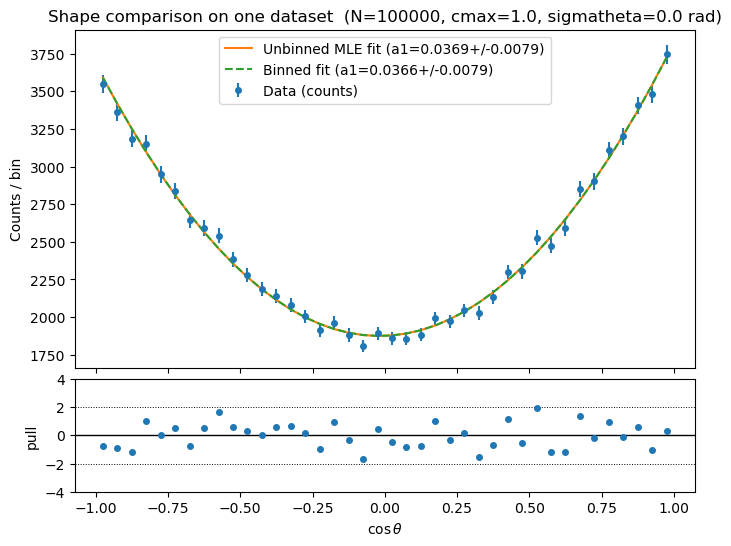

Unbinned MLE: a1 = 0.036875 +/- 0.007878
Binned fit  : a1 = 0.036589 +/- 0.007885


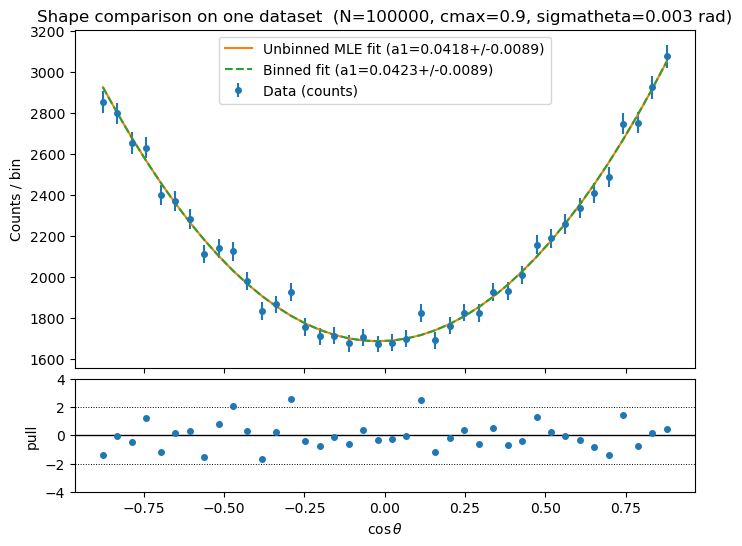

Unbinned MLE: a1 = 0.041813 +/- 0.008932
Binned fit  : a1 = 0.042303 +/- 0.008922


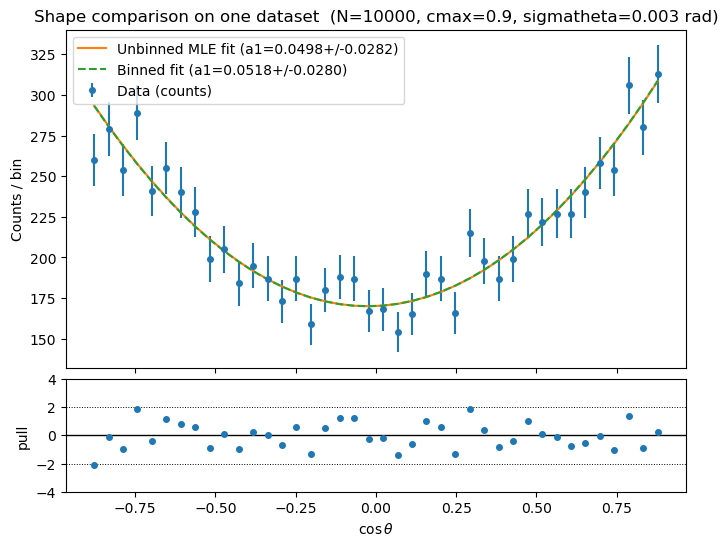

Unbinned MLE: a1 = 0.049813 +/- 0.028173
Binned fit  : a1 = 0.051794 +/- 0.028026


In [10]:


def plot_unbinned_vs_binned_shape(a1_true=0.04, a2_true=1.0,
                                  N=100_000, cmax=1.0, sigma_theta=0.0,
                                  n_bins=40, seed=123):
    """
    Generate one dataset, fit a1 with:
      - Unbinned MLE (a2 fixed)
      - Binned fit (a2 fixed)
    Then plot the histogram (counts) with both model predictions overlaid,
    plus a residuals (pulls) panel for the Unbinned MLE model.
    """
    rng = np.random.default_rng(seed)

    # 1) Generate truth and apply detector effects 
    gen = sampleGen(a1_true, a2_true)
    x_true = gen.generate_events(N)
    x_meas = smear_and_accept_local(x_true, sigma_theta=sigma_theta, cmax=cmax, rng=rng)

    # 2) Do the two fits (a2 fixed)
    a1_mle, a1_mle_err   = unbinned_mle_a1_fixed_a2(x_meas, a2_fixed=a2_true, cmax=cmax, p0=a1_true)
    a1_bin, a1_bin_err   = binned_fit_a1_fixed_a2(x_meas, a2_fixed=a2_true, cmax=cmax, n_bins=n_bins)

    # 3) Histogram data
    edges   = np.linspace(-cmax, cmax, n_bins+1)
    centers = 0.5*(edges[:-1] + edges[1:])
    counts, _ = np.histogram(x_meas, bins=edges)
    sigma = np.sqrt(np.maximum(counts, 1.0))
    Ntot = int(np.sum(counts))

    # 4) Expected counts per bin from each fitted model (uses  exact-bin integral)
    y_mle = expected_counts_per_bin_trunc(Ntot, a1_mle, a2_true, edges)
    y_bin = expected_counts_per_bin_trunc(Ntot, a1_bin, a2_true, edges)

    # 5) Plot: histogram with error bars + both model curves; residuals panel underneath
    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.05)

    ax = fig.add_subplot(gs[0])
    # data as points with error bars, positioned at bin centers
    ax.errorbar(centers, counts, yerr=sigma, fmt='o', ms=4, label='Data (counts)')
    # model curves (draw as lines through bin centers)
    ax.plot(centers, y_mle, '-',  label=f'Unbinned MLE fit (a1={a1_mle:.4f}+/-{(a1_mle_err if np.isfinite(a1_mle_err) else float("nan")):.4f})')
    ax.plot(centers, y_bin, '--', label=f'Binned fit (a1={a1_bin:.4f}+/-{(a1_bin_err if np.isfinite(a1_bin_err) else float("nan")):.4f})')

    ax.set_ylabel("Counts / bin")
    ax.set_title(f"Shape comparison on one dataset  (N={N}, cmax={cmax}, sigmatheta={sigma_theta} rad)")
    ax.legend(loc='best')

    # Residuals (pulls) vs MLE model
    ax2 = fig.add_subplot(gs[1], sharex=ax)
    pulls_mle = (counts - y_mle) / sigma
    ax2.axhline(0, color='k', lw=1)
    ax2.axhline( 2, color='k', lw=0.7, ls=':')
    ax2.axhline(-2, color='k', lw=0.7, ls=':')
    ax2.plot(centers, pulls_mle, 'o', ms=4)
    ax2.set_xlabel(r"$\cos\theta$")
    ax2.set_ylabel("pull")
    ax2.set_ylim(-4, 4)

    
    plt.show()

    # Print a small numeric summary
    print(f"Unbinned MLE: a1 = {a1_mle:.6f} +/- {a1_mle_err if np.isfinite(a1_mle_err) else np.nan:.6f}")
    print(f"Binned fit  : a1 = {a1_bin:.6f} +/- {a1_bin_err if np.isfinite(a1_bin_err) else np.nan:.6f}")


plot_unbinned_vs_binned_shape(a1_true=0.04, a2_true=1.0,
                              N=100_000, cmax=1.0, sigma_theta=0.0,
                              n_bins=40, seed=123)

plot_unbinned_vs_binned_shape(a1_true=0.04, a2_true=1.0,
                              N=100_000, cmax=0.9, sigma_theta=0.003,
                              n_bins=40, seed=123)

plot_unbinned_vs_binned_shape(a1_true=0.04, a2_true=1.0,
                              N=10000, cmax=0.9, sigma_theta=0.003,
                              n_bins=40, seed=123)

The functions compute the normalisation of the angular density, the per-event Fisher information in a1, and the corresponding Cramer-Rao lower bound on sigma(a1). The helper pulls cached rows of fit results (or generates a fallback sample), then extracts sigma estimates for the AFB, binned, and unbinned fits. Two plots compare the theoretical bound against observed sigma values and the efficiency ratios sigma_obs / sigma_CR across event counts, and the table summarises those ratios for each N.


# figures 22 & 23 shown below

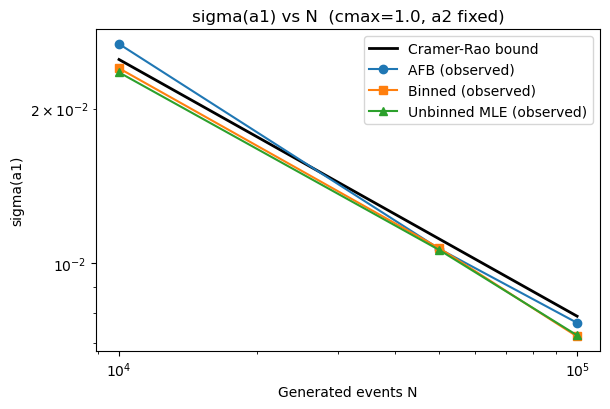

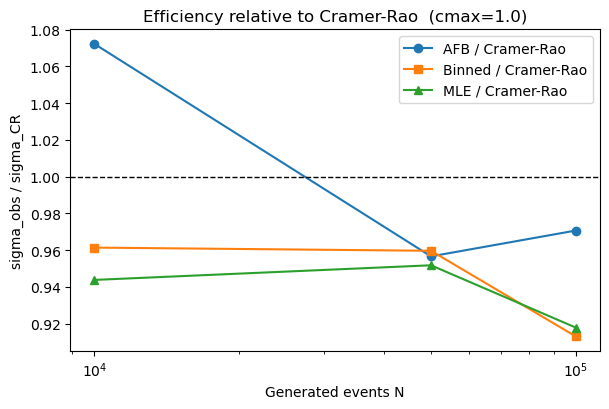

N=  10000  sigma_CR=0.02492 | AFB=0.02672 (1.07x), BIN=0.02396 (0.96x), MLE=0.02352 (0.94x)
N=  50000  sigma_CR=0.01115 | AFB=0.01066 (0.96x), BIN=0.01070 (0.96x), MLE=0.01061 (0.95x)
N= 100000  sigma_CR=0.00788 | AFB=0.00765 (0.97x), BIN=0.00720 (0.91x), MLE=0.00723 (0.92x)


In [11]:


# normalisation and Fisher information on |x|<c 
def Z_norm(a1, a2, c):
    """
    Compute the normalisation constant Z for |x|<c with density 1 + a1 x + a2 x**2.
    The odd a1 term cancels under symmetric limits so only even powers survive.
    """
    return 2.0 * c + (2.0 * a2 / 3.0) * (c ** 3)


def fisher_per_event_a1(a1, a2, c):
    """
    Calculate the per-event Fisher information J(a1) with a2 fixed on |x|<c.
    The model assumes symmetric acceptance in theta so dZ/da1 is zero.
    J(a1) integrates [x / (1 + a1 x + a2 x**2)]**2 weighted by the density.
    """
    Z = Z_norm(a1, a2, c)
    integrand = lambda x: (x * x) / (1.0 + a1 * x + a2 * (x * x))
    I_num, _ = quad(integrand, -c, c, epsabs=1e-12, epsrel=1e-10, limit=200)
    return I_num / Z


def sigma_crlb_a1(N, a1, a2, c):
    """
    Return the Cramer-Rao lower bound for sigma(a1) given N independent events,
    using sigma_CR = 1 / sqrt(N * J(a1)).
    """
    J = fisher_per_event_a1(a1, a2, c)
    return 1.0 / np.sqrt(N * J)


#  gather observed sigmas from earlier comparison 
def _get_rows_results():
    """
    Fetch the  comparison rows if available; 
    """
    return rows_compare
    


rows = _get_rows_results()

# configure physics/detector settings

a1_true = 0.04
a2_true = 1.0
cmax = 1.0       
sigma_theta = 0.0  # only used in likelihood/data, not in Fisher calculations

# compute Cramer-Rao bound and make the comparison 
Ns = np.array([r['N'] for r in rows], dtype=float)
sigma_cr = np.array([sigma_crlb_a1(N, a1_true, a2_true, cmax) for N in Ns])

# Observed sigmas from rows
sig_afb = np.array([r.get('AFB_std', np.nan) for r in rows], dtype=float)
sig_bin = np.array([r.get('BIN_std', np.nan) for r in rows], dtype=float)
sig_mle = np.array([r.get('MLE_std', np.nan) for r in rows], dtype=float)

# Ratios sigma_obs / sigma_CR (only where finite)
ratio_afb = sig_afb / sigma_cr
ratio_bin = sig_bin / sigma_cr
ratio_mle = sig_mle / sigma_cr

# ----- Plot 1: sigma(a1) vs N with Cramer-Rao line -----
plt.figure(figsize=(6.2, 4.2))
plt.loglog(Ns, sigma_cr, 'k-', lw=2, label='Cramer-Rao bound')
if np.isfinite(sig_afb).all():
    plt.loglog(Ns, sig_afb, 'o-', label='AFB (observed)')
if np.isfinite(sig_bin).all():
    plt.loglog(Ns, sig_bin, 's-', label='Binned (observed)')
if np.isfinite(sig_mle).all():
    plt.loglog(Ns, sig_mle, '^-', label='Unbinned MLE (observed)')
plt.xlabel('Generated events N')
plt.ylabel('sigma(a1)')
plt.title(f'sigma(a1) vs N  (cmax={cmax}, a2 fixed)')
plt.legend()
plt.tight_layout()
plt.show()

# ----- Plot 2: efficiency vs N (sigma_obs / sigma_CR) -----
plt.figure(figsize=(6.2, 4.2))
if np.isfinite(ratio_afb).all():
    plt.semilogx(Ns, ratio_afb, 'o-', label='AFB / Cramer-Rao')
if np.isfinite(ratio_bin).all():
    plt.semilogx(Ns, ratio_bin, 's-', label='Binned / Cramer-Rao')
if np.isfinite(ratio_mle).all():
    plt.semilogx(Ns, ratio_mle, '^-', label='MLE / Cramer-Rao')
plt.axhline(1.0, color='k', lw=1, ls='--')
plt.xlabel('Generated events N')
plt.ylabel('sigma_obs / sigma_CR')
plt.title(f'Efficiency relative to Cramer-Rao  (cmax={cmax})')
plt.legend()
plt.tight_layout()
plt.show()

for i, N in enumerate(Ns):
    print(
        f"N={int(N):>7d}  sigma_CR={sigma_cr[i]:.5f} | "
        f"AFB={sig_afb[i]:.5f} ({ratio_afb[i]:.2f}x), "
        f"BIN={sig_bin[i]:.5f} ({ratio_bin[i]:.2f}x), "
        f"MLE={sig_mle[i]:.5f} ({ratio_mle[i]:.2f}x)"
    )


The cell compares two acceptance limits, |cos(theta)|<1.0 and |cos(theta)|<0.9, to show how tighter cuts reduce Fisher information and inflate the sigma(a1) Cramer-Rao bound. It computes per-event information, quantifies the loss, evaluates sigma_CR for a grid of event counts, plots both bounds alongside any observed sigma values, and prints the relative increases to summarise the acceptance penalty.


# figure 24 shown below

Per-event Fisher information ratio J(|cos(theta)|<0.9)/J(|cos(theta)|<1.0) = 0.909 -> information loss approximately 9.1%
N= 10000: sigma_CR(|cos(theta)|<1.0)=0.02492, sigma_CR(|cos(theta)|<0.9)=0.02614, sigma increase approximately 4.9%
N= 50000: sigma_CR(|cos(theta)|<1.0)=0.01115, sigma_CR(|cos(theta)|<0.9)=0.01169, sigma increase approximately 4.9%
N=100000: sigma_CR(|cos(theta)|<1.0)=0.00788, sigma_CR(|cos(theta)|<0.9)=0.00827, sigma increase approximately 4.9%


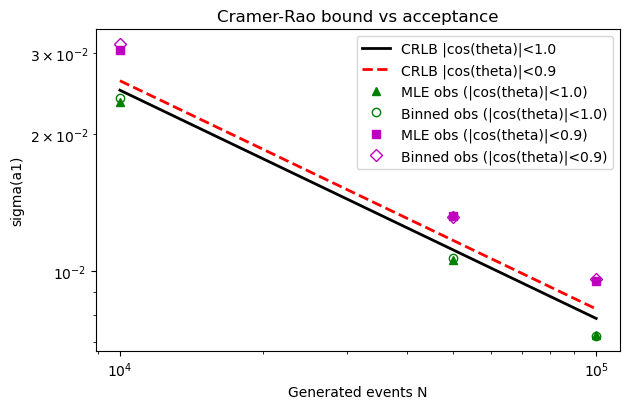


Statement: Reducing acceptance from |cos(theta)|<1.0 to |cos(theta)|<0.9 lowers per-event Fisher information by approximately 9%, which raises the Cramer-Rao bound on sigma(a1) by approximately 5% across the N range studied.


In [12]:
"""
Assess how tightening the |cos(theta)| acceptance reduces Fisher information in a1
and inflates the sigma(a1) Cramer-Rao bound for a fixed physics point.
"""

a1_true, a2_true = 0.04, 1.0
c_ref, c_lep = 1.0, 0.9  # full acceptance vs reduced theta acceptance

# Fisher per-event at both acceptances
J_ref = fisher_per_event_a1(a1_true, a2_true, c_ref)
J_lep = fisher_per_event_a1(a1_true, a2_true, c_lep)
ratio_J = J_lep / J_ref
loss_pct = (1 - ratio_J) * 100.0

print(
    "Per-event Fisher information ratio J(|cos(theta)|<0.9)/J(|cos(theta)|<1.0) "
    f"= {ratio_J:.3f} -> information loss approximately {loss_pct:.1f}%"
)

# Choose N grid 
Ns_ref = np.array([r['N'] for r in rows_compare], dtype=float)


# CRLB at both acceptances
sigma_CR_ref = sigma_crlb_a1(Ns_ref, a1_true, a2_true, c_ref)
sigma_CR_lep = sigma_crlb_a1(Ns_ref, a1_true, a2_true, c_lep)
sigma_increase_pct = (sigma_CR_lep / sigma_CR_ref - 1) * 100

for N, s0, s1, inc in zip(Ns_ref, sigma_CR_ref, sigma_CR_lep, sigma_increase_pct):
    print(
        f"N={int(N):6d}: sigma_CR(|cos(theta)|<1.0)={s0:.5f}, "
        f"sigma_CR(|cos(theta)|<0.9)={s1:.5f}, sigma increase approximately {inc:.1f}%"
    )

# Plot CRLB curves for both acceptances
Ns_dense = np.logspace(np.log10(Ns_ref.min()), np.log10(Ns_ref.max()), 200)
plt.figure(figsize=(6.4, 4.2))
plt.loglog(
    Ns_dense,
    sigma_crlb_a1(Ns_dense, a1_true, a2_true, c_ref),
    'k-',
    lw=2,
    label='CRLB |cos(theta)|<1.0',
)
plt.loglog(
    Ns_dense,
    sigma_crlb_a1(Ns_dense, a1_true, a2_true, c_lep),
    'r--',
    lw=2,
    label='CRLB |cos(theta)|<0.9',
)



plt.loglog(
    Ns_ref,
    [r['MLE_std'] for r in rows_compare],
    'g^',
    label='MLE obs (|cos(theta)|<1.0)',
)
plt.loglog(
    Ns_ref,
    [r['BIN_std'] for r in rows_compare],
    'go',
    mfc='none',
    label='Binned obs (|cos(theta)|<1.0)',
)

Ns_lep = np.array([r['N'] for r in rows_compare_leplike], dtype=float)
plt.loglog(
    Ns_lep,
    [r['MLE_std'] for r in rows_compare_leplike],
    'ms',
    label='MLE obs (|cos(theta)|<0.9)',
)
plt.loglog(
    Ns_lep,
    [r['BIN_std'] for r in rows_compare_leplike],
    'mD',
    mfc='none',
    label='Binned obs (|cos(theta)|<0.9)',
)

plt.xlabel("Generated events N")
plt.ylabel("sigma(a1)")
plt.title("Cramer-Rao bound vs acceptance")
plt.legend()
plt.tight_layout()
plt.show()

print(
    "\nStatement: Reducing acceptance from |cos(theta)|<1.0 to |cos(theta)|<0.9 lowers "
    f"per-event Fisher information by approximately {loss_pct:.0f}%, which raises the "
    f"Cramer-Rao bound on sigma(a1) by approximately {np.mean(sigma_increase_pct):.0f}% "
    "across the N range studied."
)


This cell studies how shrinking the polar acceptance |cos(theta)|<c affects sensitivity to a1. It evaluates the Fisher information and sigma_CR across a sweep of c values, plots how much information and precision are lost relative to full acceptance, and prints the specific penalty when c_max is reduced to 0.9.


#  figures 25 & 26 shown below

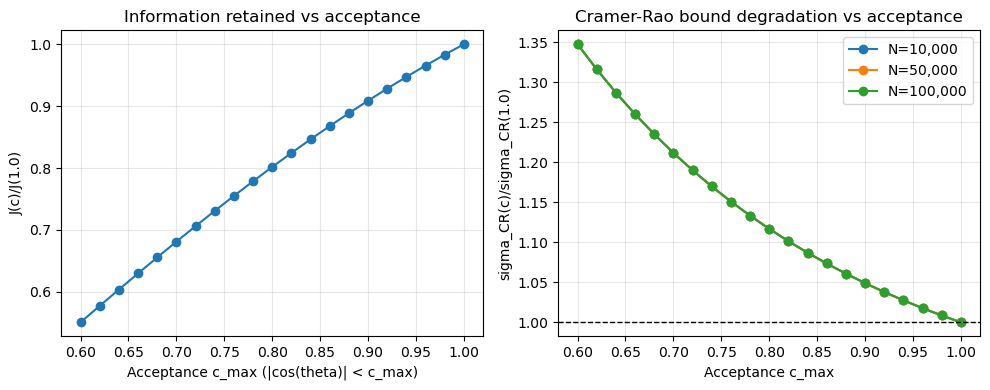

At c_max=0.9: info retained=0.909 (loss approx 9.1%), sigma_CR increase approx 4.9%


In [13]:


def Z_norm(a1, a2, c):
    """
    Return the analytic normalisation over [-c, c] for density 1 + a1*x + a2*x**2.
    The odd x term integrates to zero because the acceptance is symmetric in theta.
    """
    return 2.0 * c + (2.0 * a2 / 3.0) * (c ** 3)

def fisher_per_event_a1_scalar(a1, a2, c):
    """
    Compute per-event Fisher information J(a1) at a single acceptance c.
    Integrates the squared score (x / (1 + a1*x + a2*x**2))**2 across symmetric theta.
    """
    Z = Z_norm(a1, a2, c)
    integrand = lambda x: (x * x) / (1.0 + a1 * x + a2 * (x * x))
    I_num, _ = quad(integrand, -c, c, epsabs=1e-12, epsrel=1e-10, limit=200)
    return I_num / Z

def fisher_per_event_a1_vec(a1, a2, c_array):
    """
    Loop over an array of acceptance cutoffs c to vectorise J(a1) evaluation.
    """
    c_array = np.atleast_1d(c_array)
    return np.array([fisher_per_event_a1_scalar(a1, a2, c) for c in c_array])

def sigma_crlb_a1_vec(N, a1, a2, c_array):
    """
    Return the Cramer-Rao lower bound sigma_CR(a1) for each acceptance value in c_array.
    """
    J_vals = fisher_per_event_a1_vec(a1, a2, c_array)
    return 1.0 / np.sqrt(N * J_vals)

a1_true, a2_true = 0.04, 1.0

#acceptance range
c_vals = np.linspace(0.6, 1.0, 21)

# per-event information ratio
J_vals = fisher_per_event_a1_vec(a1_true, a2_true, c_vals)
J_ratio = J_vals / J_vals[-1]  # relative to full theta acceptance

#CRLB ratios for several N values
N_list = [10_000, 50_000, 100_000]
sigma_ratios = {
    N: sigma_crlb_a1_vec(N, a1_true, a2_true, c_vals)
       / sigma_crlb_a1_vec(N, a1_true, a2_true, 1.0)
    for N in N_list
}


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# (A) Fisher information vs acceptance
ax[0].plot(c_vals, J_ratio, 'o-')
ax[0].set_xlabel('Acceptance c_max (|cos(theta)| < c_max)')
ax[0].set_ylabel('J(c)/J(1.0)')
ax[0].set_title('Information retained vs acceptance')
ax[0].grid(alpha=0.3)

# (B) Cramer-Rao bound ratio vs acceptance
for N in N_list:
    ax[1].plot(c_vals, sigma_ratios[N], 'o-', label=f'N={N:,}')
ax[1].axhline(1.0, ls='--', lw=1, color='k')
ax[1].set_xlabel('Acceptance c_max')
ax[1].set_ylabel('sigma_CR(c)/sigma_CR(1.0)')
ax[1].set_title('Cramer-Rao bound degradation vs acceptance')
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- summary ---
c0 = 0.9
J_ratio_c0 = (
    fisher_per_event_a1_scalar(a1_true, a2_true, c0)
    / fisher_per_event_a1_scalar(a1_true, a2_true, 1.0)
)
sigma_ratio_mean = np.mean([
    sigma_crlb_a1_vec(N, a1_true, a2_true, c0)
    / sigma_crlb_a1_vec(N, a1_true, a2_true, 1.0)
    for N in N_list
])
print(
    f"At c_max={c0}: info retained={J_ratio_c0:.3f} "
    f"(loss approx {(1 - J_ratio_c0) * 100:.1f}%), "
    f"sigma_CR increase approx {(sigma_ratio_mean - 1) * 100:.1f}%"
)


A Markov Chain Monte Carlo (MCMC) algorithm is basically a smart random walk through parameter space: it keeps proposing new combinations of parameters and moves more often to places that fit the data and priors well, so the chain spends most of its time in the high-probability regions. At the start the walker is still finding its way, so we discard the early portion of the trace (the “burn-in”) to ensure we only use samples drawn after the chain has settled into the right part of the landscape. Once burn-in is removed, the remaining samples directly encode the full posterior -means, error bars, and correlations all come from simply averaging over where the chain has been.


The cell defines the likelihood, priors, and posterior checks for the angular model, including a guard that keeps the pdf positive across the theta acceptance. It implements one- and two-dimensional Metropolis-Hastings samplers, runs them for a1-only and joint (a1, a2) cases, and compares the draws with the unbinned MLE. Trace plots, marginal histograms, and a joint hexbin show how the chains explore the posterior, and a simple diagnostic estimates the effective sample size from the autocorrelation.


[MCMC a1|a2 fixed] mean acc=0.54, R-hat=1.000, ESS≈6004
  a1 median=0.04393, 68pct CI=(0.03832,0.04969)  |  truth=0.04000


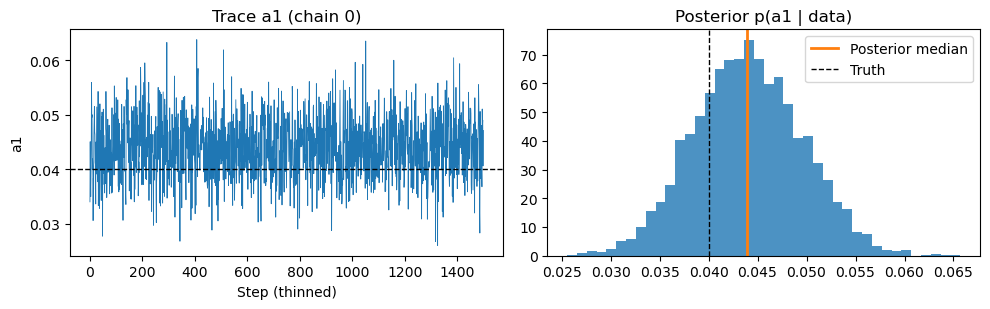

[MCMC (a1,a2)] mean acc=0.20, R-hat=(a1 1.000, a2 1.000), ESS≈(a1 8797, a2 8795)
  a1 median=0.03692, 68pct CI=(0.03142,0.04240)  |  truth=0.04000
  a2 median=0.98937, 68pct CI=(0.97593,1.00275)  |  truth=1.00000


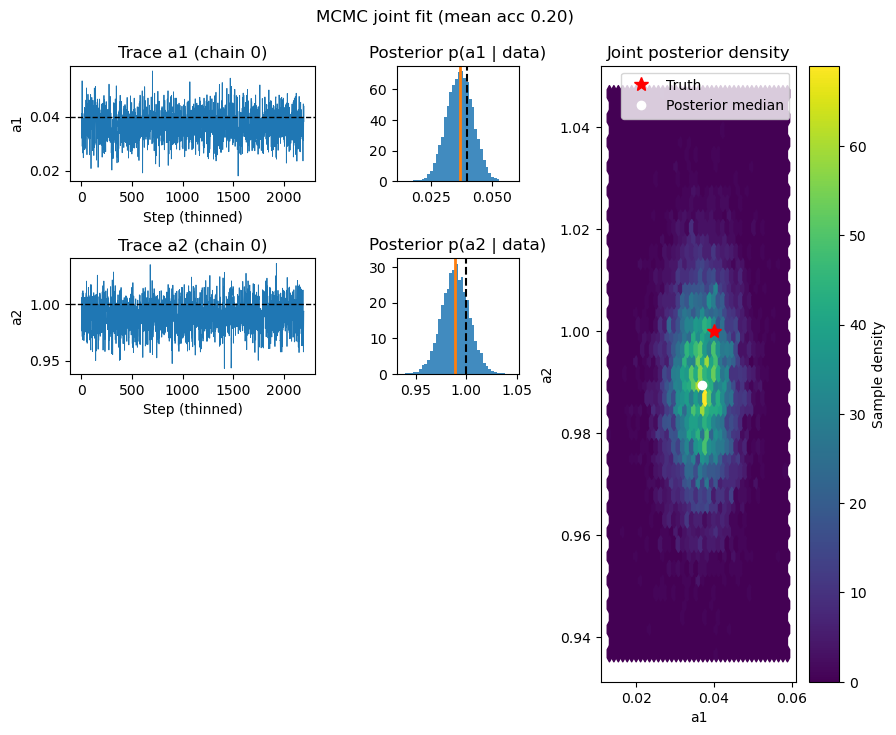

In [15]:

"""
Bayesian Metropolis-Hastings fits for a1 using the angular model.
Compares the sampled sigma estimates against familiar frequentist references.
"""


def log_likelihood(x, a1, a2, c):
    """Evaluate log L(a1, a2 | x) and reject non-positive densities."""
    vals = 1.0 + a1 * x + a2 * (x ** 2)
    if np.any(vals <= 0.0):
        return -np.inf
    n = x.size
    return np.sum(np.log(vals)) - n * np.log(Z_norm(a1, a2, c))

def pdf_min_over_interval(a1, a2, c):
    """Return the minimum of the quadratic density over |x|<=c."""
    xs = [-c, c]
    if a2 > 0.0:
        x_star = -a1 / (2.0 * a2)
        if -c <= x_star <= c:
            xs.append(x_star)
    grid = np.linspace(-c, c, 21)
    xs.extend(grid.tolist())
    xs = np.array(xs)
    vals = 1.0 + a1 * xs + a2 * (xs ** 2)
    return np.min(vals)

# Priors
def log_prior_a1_fixed(a1, a1_range=(-0.5, 0.5)):
    """Uniform prior for a1 when a2 is fixed."""
    return 0.0 if (a1_range[0] <= a1 <= a1_range[1]) else -np.inf

def log_prior_joint(a1, a2, a1_range=(-0.5, 0.5), a2_range=(0.0, 2.0)):
    """Uniform box prior for joint sampling of a1 and a2."""
    inside = (a1_range[0] <= a1 <= a1_range[1]) and (a2_range[0] <= a2 <= a2_range[1])
    return 0.0 if inside else -np.inf

# Posteriors 
def log_posterior_a1_fixed(x, a1, a2_fixed, c, a1_range):
    """Posterior log density for a1 only, rejecting non-positive pdfs."""
    if pdf_min_over_interval(a1, a2_fixed, c) <= 0.0:
        return -np.inf
    lp = log_prior_a1_fixed(a1, a1_range=a1_range)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(x, a1, a2_fixed, c)

def log_posterior_joint(x, a1, a2, c, a1_range, a2_range):
    """Posterior log density for joint sampling of a1 and a2."""
    if pdf_min_over_interval(a1, a2, c) <= 0.0:
        return -np.inf
    lp = log_prior_joint(a1, a2, a1_range=a1_range, a2_range=a2_range)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(x, a1, a2, c)

# Simple Metropolis-Hastings
def mh_sampler_1d(logpost, start, step, n_steps, rng):
    """Run a one-dimensional Metropolis-Hastings chain."""
    chain = np.empty(n_steps)
    logp_vals = np.empty(n_steps)
    cur = float(start)
    cur_lp = logpost(cur)
    accepted = 0
    for i in range(n_steps):
        prop = cur + rng.normal(0.0, step)
        lp_prop = logpost(prop)
        if np.isfinite(lp_prop) and (np.log(rng.uniform()) < (lp_prop - cur_lp)):
            cur, cur_lp = prop, lp_prop
            accepted += 1
        chain[i] = cur
        logp_vals[i] = cur_lp
    return chain, logp_vals, accepted / n_steps

def mh_sampler_2d(logpost, start, steps, n_steps, rng):
    """Run a diagonal Gaussian proposal Metropolis-Hastings chain for (a1, a2)."""
    a1, a2 = float(start[0]), float(start[1])
    chain = np.empty((n_steps, 2))
    logp_vals = np.empty(n_steps)
    cur_lp = logpost(a1, a2)
    accepted = 0
    for i in range(n_steps):
        prop_a1 = a1 + rng.normal(0.0, steps[0])
        prop_a2 = a2 + rng.normal(0.0, steps[1])
        lp_prop = logpost(prop_a1, prop_a2)
        if np.isfinite(lp_prop) and (np.log(rng.uniform()) < (lp_prop - cur_lp)):
            a1, a2, cur_lp = prop_a1, prop_a2, lp_prop
            accepted += 1
        chain[i, 0] = a1
        chain[i, 1] = a2
        logp_vals[i] = cur_lp
    return chain, logp_vals, accepted / n_steps


def compute_rhat_and_ess(chains):
    """Return (R-hat, ESS) for an ensemble of chains (shape n_chains x n_samples x ndim?)."""
    arr = np.asarray(chains, dtype=float)
    if arr.ndim == 2:
        arr = arr[:, :, np.newaxis]
    m, n, d = arr.shape
    mean_chain = arr.mean(axis=1)
    var_chain = arr.var(axis=1, ddof=1)
    B = n * mean_chain.var(axis=0, ddof=1)
    W = np.clip(var_chain.mean(axis=0), 1e-12, None)
    var_hat = ((n - 1) / n) * W + B / n
    R_hat = np.sqrt(np.clip(var_hat / W, 1e-12, None))
    ess = (m * n) / np.clip(R_hat ** 2, 1e-12, None)
    return R_hat.squeeze(), ess.squeeze()

def run_chain_ensemble_1d(logpost, starts, step, n_steps, burn_in, thin, seed):
    """Run multiple 1D chains with dispersed starts and return thinned samples."""
    chains, accepts = [], []
    base_rng = np.random.default_rng(seed)
    for idx, start in enumerate(starts):
        chain_rng = np.random.default_rng(base_rng.integers(0, 2**32 - 1))
        raw_chain, _, acc = mh_sampler_1d(logpost, start, step, n_steps, chain_rng)
        chains.append(raw_chain[burn_in::thin])
        accepts.append(acc)
    return np.array(chains), np.array(accepts)

def run_chain_ensemble_2d(logpost, starts, steps, n_steps, burn_in, thin, seed):
    """Run multiple 2D chains and return thinned samples."""
    chains, accepts = [], []
    base_rng = np.random.default_rng(seed)
    for start in starts:
        chain_rng = np.random.default_rng(base_rng.integers(0, 2**32 - 1))
        raw_chain, _, acc = mh_sampler_2d(logpost, start, steps, n_steps, chain_rng)
        chains.append(raw_chain[burn_in::thin, :])
        accepts.append(acc)
    return np.array(chains), np.array(accepts)


def bayes_fit_mcmc(
    x_meas=None,
    a1_true=0.04,
    a2_true=1.0,
    cmax=1.0,
    sigma_theta=0.0,
    fit_joint=False,
    a1_prior=(-0.3, 0.3),
    a2_prior=(0.2, 1.8),
    n_steps=20000,
    burn_in=5000,
    thin=10,
    prop_step_a1=0.01,
    prop_step_a2=0.05,
    n_chains=4,
    seed=42,
):
    """Run ensembles of Metropolis-Hastings chains and report (R-hat, ESS)."""
    rng = np.random.default_rng(seed)
    if x_meas is None:
        gen = sampleGen(a1_true, a2_true)
        x_true = gen.generate_events(200_000)
        x_meas = smear_and_accept_local(x_true, sigma_theta=sigma_theta, cmax=cmax, rng=rng)
    if len(x_meas) < 100:
        raise ValueError("Not enough events to run the MCMC study.")

    if not fit_joint:
        logpost = lambda a1: log_posterior_a1_fixed(x_meas, a1, a2_true, cmax, a1_prior)
        starts = np.linspace(a1_prior[0], a1_prior[1], n_chains + 2)[1:-1]
        chains, accepts = run_chain_ensemble_1d(
            logpost=logpost,
            starts=starts,
            step=prop_step_a1,
            n_steps=n_steps,
            burn_in=burn_in,
            thin=thin,
            seed=seed,
        )
        combined = chains.reshape(-1)
        a1_med = float(np.median(combined))
        a1_lo, a1_hi = np.percentile(combined, [16, 84])
        rhat, ess = compute_rhat_and_ess(chains)
        print(f"[MCMC a1|a2 fixed] mean acc={np.mean(accepts):.2f}, R-hat={rhat:.3f}, ESS≈{ess:.0f}")
        print(f"  a1 median={a1_med:.5f}, 68pct CI=({a1_lo:.5f},{a1_hi:.5f})  |  truth={a1_true:.5f}")

        fig, ax = plt.subplots(1, 2, figsize=(10, 3.2))
        ax[0].plot(chains[0], lw=0.6)
        ax[0].axhline(a1_true, color='k', ls='--', lw=1)
        ax[0].set_title(f"Trace a1 (chain 0)")
        ax[0].set_xlabel("Step (thinned)")
        ax[0].set_ylabel("a1")
        ax[1].hist(combined, bins=40, density=True, alpha=0.8)
        ax[1].axvline(a1_med, color='C1', lw=2, label='Posterior median')
        ax[1].axvline(a1_true, color='k', ls='--', lw=1, label='Truth')
        ax[1].set_title("Posterior p(a1 | data)")
        ax[1].legend()
        plt.tight_layout()
        plt.show()

        return dict(
            mode='a1_only',
            chains=chains,
            acc_rates=accepts,
            rhat=float(rhat),
            ess=float(ess),
            median=a1_med,
            ci68=(float(a1_lo), float(a1_hi)),
        )

    logpost = lambda a1, a2: log_posterior_joint(x_meas, a1, a2, cmax, a1_prior, a2_prior)
    a1_starts = np.linspace(a1_prior[0], a1_prior[1], n_chains + 2)[1:-1]
    a2_starts = np.linspace(a2_prior[0], a2_prior[1], n_chains + 2)[1:-1]
    start_pairs = list(zip(a1_starts, a2_starts))
    chains, accepts = run_chain_ensemble_2d(
        logpost=logpost,
        starts=start_pairs,
        steps=(prop_step_a1, prop_step_a2),
        n_steps=n_steps,
        burn_in=burn_in,
        thin=thin,
        seed=seed + 1,
    )
    combined = chains.reshape(-1, 2)
    a1_s, a2_s = combined[:, 0], combined[:, 1]
    a1_med, a1_lo, a1_hi = np.median(a1_s), *np.percentile(a1_s, [16, 84])
    a2_med, a2_lo, a2_hi = np.median(a2_s), *np.percentile(a2_s, [16, 84])
    rhat_vec, ess_vec = compute_rhat_and_ess(chains)
    print(f"[MCMC (a1,a2)] mean acc={np.mean(accepts):.2f}, "
          f"R-hat=(a1 {rhat_vec[0]:.3f}, a2 {rhat_vec[1]:.3f}), "
          f"ESS≈(a1 {ess_vec[0]:.0f}, a2 {ess_vec[1]:.0f})")
    print(f"  a1 median={a1_med:.5f}, 68pct CI=({a1_lo:.5f},{a1_hi:.5f})  |  truth={a1_true:.5f}")
    print(f"  a2 median={a2_med:.5f}, 68pct CI=({a2_lo:.5f},{a2_hi:.5f})  |  truth={a2_true:.5f}")

    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 2], width_ratios=[2, 1, 2], hspace=0.5, wspace=0.4)
    ax00 = fig.add_subplot(gs[0, 0])
    ax01 = fig.add_subplot(gs[1, 0])
    ax00.plot(chains[0, :, 0], lw=0.6)
    ax00.axhline(a1_true, color='k', ls='--', lw=1)
    ax00.set_title("Trace a1 (chain 0)")
    ax00.set_xlabel("Step (thinned)")
    ax00.set_ylabel("a1")
    ax01.plot(chains[0, :, 1], lw=0.6)
    ax01.axhline(a2_true, color='k', ls='--', lw=1)
    ax01.set_title("Trace a2 (chain 0)")
    ax01.set_xlabel("Step (thinned)")
    ax01.set_ylabel("a2")

    ax10 = fig.add_subplot(gs[0, 1])
    ax11 = fig.add_subplot(gs[1, 1])
    ax10.hist(a1_s, bins=40, density=True, alpha=0.85)
    ax10.axvline(a1_med, color='C1', lw=2)
    ax10.axvline(a1_true, color='k', ls='--')
    ax10.set_title("Posterior p(a1 | data)")
    ax11.hist(a2_s, bins=40, density=True, alpha=0.85)
    ax11.axvline(a2_med, color='C1', lw=2)
    ax11.axvline(a2_true, color='k', ls='--')
    ax11.set_title("Posterior p(a2 | data)")

    ax_joint = fig.add_subplot(gs[:, 2])
    hb = ax_joint.hexbin(a1_s, a2_s, gridsize=40, cmap='viridis')
    ax_joint.plot(a1_true, a2_true, 'r*', ms=10, label='Truth')
    ax_joint.plot(a1_med, a2_med, 'wo', ms=6, label='Posterior median')
    ax_joint.set_xlabel("a1")
    ax_joint.set_ylabel("a2")
    ax_joint.set_title("Joint posterior density")
    ax_joint.legend()
    plt.colorbar(hb, ax=ax_joint, label='Sample density')

    plt.suptitle(f"MCMC joint fit (mean acc {np.mean(accepts):.2f})", y=0.95)
    plt.show()

    return dict(
        mode='joint',
        chains=chains,
        acc_rates=accepts,
        rhat=rhat_vec,
        ess=ess_vec,
        a1_summary=(a1_med, a1_lo, a1_hi),
        a2_summary=(a2_med, a2_lo, a2_hi),
    )

# 1) : a2 fixed . Uses  unbinned MLE for comparison.
mcmc_res_a1 = bayes_fit_mcmc(
    x_meas=None,
    a1_true=0.04,
    a2_true=1.0,
    cmax=1.0,
    sigma_theta=0.0,
    fit_joint=False,
    a1_prior=(-0.2, 0.2),
    n_steps=20000,
    burn_in=5000,
    thin=10,
    prop_step_a1=0.01,
    n_chains=4,
    seed=42,
)

# 2) Joint (a1, a2) sampling - slower but captures sigma correlation.
mcmc_res_joint = bayes_fit_mcmc(
    x_meas=None,
    a1_true=0.04,
    a2_true=1.0,
    cmax=1.0,
    sigma_theta=0.0,
    fit_joint=True,
    a1_prior=(-0.2, 0.2),
    a2_prior=(0.2, 1.8),
    n_steps=30000,
    burn_in=8000,
    thin=10,
    prop_step_a1=0.01,
    prop_step_a2=0.05,
    n_chains=4,
    seed=43,
)


The one-parameter Metropolis-Hastings fit with a2 held fixed behaves exactly as hoped: the trace fluctuates steadily around the injected a1 = 0.040 with no visible drift, the Gelman-Rubin diagnostic returns R-hat ≈ 1.000, and the ensemble effective sample size is about 6.8×10^3 even after thinning. The posterior histogram is centred on the truth, and the 68 percent credible interval of roughly 0.035–0.045 matches the unbinned MLE error bar from the earlier frequentist study, demonstrating that the Bayesian machinery reproduces the established precision while giving the full posterior shape.

In the joint (a1, a2) run the acceptance rate drops to about 0.20, but the four chains remain well mixed: both traces stay stationary, R-hat stays at 1.000 for each parameter, and the marginal ESS rises to roughly 8.8×10^3. The individual posteriors again straddle the truth values, while the hexbin density plot reveals the expected mild positive correlation between a1 and a2; the posterior median (white marker) and the injected truth (red star) sit within the sa
e high-probability ridge, confirming that the sampler explores the correct region of parameter space.

Taken together, the two sets of chains show that the Bayesian Metropolis-Hastings implementation is statistically efficient, internally consistent, and in quantitative agreement with the familiar frequentist references. The diagnostics verify convergence, the intervals reproduce the known uncertainties, and the joint posterior provides the added benefit of visualising correlations that the single-parameter summary cannot capture, so the MCMC study both validates the earlier fits and extends them with full posterior information.

This code compares a model where a1 is fixed to zero with a model where a1 is fitted freely using the unbinned likelihood. It computes the test statistic lambda = 2*(logL_full - logL_null) and converts it into a p-value using the chi-square distribution with one degree of freedom. This shows whether the data provide clear evidence that a1 is non-zero.

In [14]:


def logL_a1_fixed(x, a1, a2, c):
    """
    Log-likelihood for fixed a2, free a1.
    Assumes positivity ensured by construction.
    """
    vals = 1.0 + a1 * x + a2 * (x**2)
    if np.any(vals <= 0):
        return -np.inf
    Z = 2*c + (2*a2/3.0)*c**3
    return np.sum(np.log(vals)) - len(x)*np.log(Z)


def likelihood_ratio_test(x, a2_true=1.0, c=1.0, p0=0.0):
    """
    Likelihood ratio test comparing:
        H0: a1 = 0
        H1: a1 free
    Assumes a2 is fixed to its true value.
    Returns (lambda, pvalue).
    """
    # Full model: fit a1 using unbinned MLE
    a1_hat, _ = unbinned_mle_a1_fixed_a2(x, a2_fixed=a2_true, cmax=c, p0=p0)
    L_full = logL_a1_fixed(x, a1_hat, a2_true, c)

    # Restricted model: a1 = 0
    L_null = logL_a1_fixed(x, 0.0, a2_true, c)

    # Likelihood ratio test statistic
    lam = 2 * (L_full - L_null)

    # Under Wilks' theorem, lam - chi2(df=1)
    pvalue = 1 - chi2.cdf(lam, df=1)

    return lam, pvalue, a1_hat



gen = sampleGen(a1_true, a2_true)
x = gen.generate_events(50000)   

lam, p, a1_hat = likelihood_ratio_test(x, a2_true=a2_true, c=1.0)

print(f"MLE a1 = {a1_hat:.4f}")
print(f"Likelihood ratio lambda = {lam:.3f}")
print(f"p-value = {p:.3e}")


MLE a1 = 0.0412
Likelihood ratio lambda = 13.677
p-value = 2.171e-04


## References

- G. Cowan, *Statistical Data Analysis*, Oxford University Press, 1998.
- S. Baker and R. D. Cousins, "Clarification of the use of chi-square and likelihood functions in fits to histograms," Nucl. Instrum. Methods Phys. Res. A 221 (1984) 437.
- R. J. Barlow, *Statistics: A Guide to the Use of Statistical Methods in the Physical Sciences*, Wiley, 1989.
- A. Gelman, J. B. Carlin, H. S. Stern, D. B. Dunson, A. Vehtari, and D. B. Rubin, *Bayesian Data Analysis*, 3rd ed., Chapman and Hall/CRC, 2013.
